Project: Armed Conflict Location and Event Dataset (ACLED) & World Development Indicators (WDI)   
Purpose: To predict instances, intensities, and types of conflict from development indicators   
Outline:   
Input:   
* ACLED Dataset <Source: https://acleddata.com/acleddatanew/data-export-tool/>
* WDI Dataset <Source:https://databank.worldbank.org/source/world-development-indicators#>   

Output:     
Author: Rafael Panlilio   
Last Modified: 14 July, 2020   

## 1. Setup

### 1.1 Import Libraries

In [1]:
import os
import sys
import scipy
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from math import sqrt

!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\user\anaconda\lib\site-packages (0.7.0)


### 1.2 Check Versions

In [2]:
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.23.1


## 2. Load the Data

### 2.1 Load Datasets

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Upload the World Development Indicators Data
wdi = pd.read_csv('wdi_data.csv')

# Upload the Armed Conflict Location and Event Data
acled = pd.read_csv('acled_data.csv')

**World Development Indicators Data (WDI)**   
World Development Indicators (WDI) is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates. Data is available on 1,431 development indicators across 217 countries from 1960 to 2019.   
   
The dataset consists of 64 columns and 310,527 rows at the country-series level.
* The first and second column contain country name and code values.
* The third and fourth column contain development indicator series name and code values.
* Columns five to sixty-four contain values for each year corresponding to the respective country and series.

**Armed Conflict Location & Event Data Project (ACLED)**   
The Armed Conflict Location & Event Data Project (ACLED) is a publicly available conflict event dataset designed for disaggregated conflict analysis and crisis mapping. The dataset contains information on the dates and locations of all reported political violence events in over 50 developing countries, with a focus on Africa. The data are drawn from news reports, publications by civil society and human rights organisations, and security updates from international organisations. Data is available on 770,105 conflict events across 149 countries from 1917 to 2020.

The dataset consists of 31 columns and 770,105 at the event-level.
* Columns one to four contain identifying data for each event.
* Columnds five and seven contain data on the time when each event occurred.
* Columns eight to sixteen contain data on the type of event and actors involved.
* Columns eighteen to twenty five and thirty one contain data on the location where each event occurred.
* Columns twenty six to twenty eight contain data on the source of information and any additional notes for each event.
* Column twenty nine contains data on the number of fatalities occurring for each event.
* Column thirty contains the time stamp for each event.

In [5]:
# Shape of Data
print("Shape of Data (WDI):                ",wdi.shape)
print("Shape of Data (ACLED):              ", acled.shape)

# Countries Included
print("Countries Included in Data (WDI):   ", wdi['Country Name'].nunique())
print("Countries Included in Data (ACLED): ", acled['country'].nunique())

Shape of Data (WDI):                 (310527, 64)
Shape of Data (ACLED):               (770105, 31)
Countries Included in Data (WDI):    217
Countries Included in Data (ACLED):  149


In [6]:
# WDI Summary Statistics
wdi.describe()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
count,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527,310527
unique,217,217,1431,1431,27099,30233,31743,31791,32262,33731,33973,35082,34916,35314,46525,51821,53723,53607,54731,57363,59021,61449,61610,62141,65326,66551,67054,67129,67553,68498,69094,69583,69509,70498,83806,89445,91888,93297,94812,99516,99505,99927,101331,105932,117073,116581,119622,119133,121584,124439,124838,127517,128486,128368,129870,132319,132491,129503,133191,128458,127014,119468,103037,53809
top,Libya,MAF,Individuals using the Internet (% of population),NV.MNF.MTRN.ZS.UN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
freq,1431,1431,217,217,280233,277255,275448,275490,274964,272832,273029,271617,271940,270426,253865,248290,246008,246428,245305,241976,240073,237166,237455,236833,232521,231034,230219,230388,229864,228761,228085,227036,227263,225740,206252,201767,198169,197123,195492,188458,188863,187987,186375,181233,160035,167625,163487,163111,158523,148306,148827,145719,146218,145899,132924,140151,138057,142058,136656,139388,140317,153766,173983,243023


In [7]:
# ACLED Summary Statistics
acled.describe()

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,latitude,longitude,geo_precision,fatalities,timestamp
count,7.701050e+05,770105.000000,770104.000000,770105.000000,770105.000000,770105.000000,770105.000000,770105.000000,770105.000000,770105.000000,770105.000000,770105.000000,7.701050e+05
mean,6.168147e+06,489.473861,16890.540505,2016.194370,1.078952,3.844085,2.231677,34.916549,21.404507,39.963610,1.351011,1.693970,1.571967e+09
std,6.563466e+05,286.928781,18510.044017,4.323637,0.307294,2.332418,2.729194,21.804923,17.699856,41.112906,0.539730,17.981446,9.583781e+06
min,4.554781e+06,0.000000,1.000000,1997.000000,1.000000,1.000000,0.000000,10.000000,-54.924400,-117.065200,1.000000,0.000000,1.552576e+09
25%,5.667352e+06,275.000000,2979.000000,2016.000000,1.000000,2.000000,0.000000,13.000000,10.626100,30.041700,1.000000,0.000000,1.564451e+09
50%,6.204691e+06,566.000000,9064.000000,2018.000000,1.000000,3.000000,1.000000,28.000000,25.927700,42.548700,1.000000,0.000000,1.572006e+09
75%,6.819844e+06,760.000000,26030.000000,2019.000000,1.000000,6.000000,3.000000,60.000000,34.432200,68.422500,2.000000,0.000000,1.580847e+09
max,7.092139e+06,894.000000,78302.000000,2020.000000,3.000000,8.000000,8.000000,88.000000,69.353500,177.510300,3.000000,1350.000000,1.589379e+09


In [8]:
# WDI Data Types
wdi.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
1960 [YR1960]    object
1961 [YR1961]    object
1962 [YR1962]    object
1963 [YR1963]    object
1964 [YR1964]    object
1965 [YR1965]    object
1966 [YR1966]    object
1967 [YR1967]    object
1968 [YR1968]    object
1969 [YR1969]    object
1970 [YR1970]    object
1971 [YR1971]    object
1972 [YR1972]    object
1973 [YR1973]    object
1974 [YR1974]    object
1975 [YR1975]    object
1976 [YR1976]    object
1977 [YR1977]    object
1978 [YR1978]    object
1979 [YR1979]    object
1980 [YR1980]    object
1981 [YR1981]    object
1982 [YR1982]    object
1983 [YR1983]    object
1984 [YR1984]    object
1985 [YR1985]    object
1986 [YR1986]    object
1987 [YR1987]    object
1988 [YR1988]    object
1989 [YR1989]    object
1990 [YR1990]    object
1991 [YR1991]    object
1992 [YR1992]    object
1993 [YR1993]    object
1994 [YR1994]    object
1995 [YR1995]    object
1996 [YR1996]    object
1997 [YR1997]   

In [9]:
# ACLED Data Types
acled.dtypes

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty    float64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3               object
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object

In [10]:
# ACLED Groupby
acled.groupby('event_type').size()

event_type
Battles                       190981
Explosions/Remote violence    156123
Protests                      225481
Riots                          63891
Strategic developments         35858
Violence against civilians     97771
dtype: int64

In [11]:
# WDI & ACLED Countries
wdi_countries = wdi['Country Name'].unique()
acled_countries = acled['country'].unique()
print("Countries in ACLED Dataset not listed in WDI Data. These countries will either have their names adjusted to match the WDI Dataset or treated accordingly.:")
list(set(acled_countries) - set(wdi_countries))

Countries in ACLED Dataset not listed in WDI Data. These countries will either have their names adjusted to match the WDI Dataset or treated accordingly.:


['Saint Kitts and Nevis',
 'Caribbean Netherlands',
 'Saint-Martin',
 'Egypt',
 'Democratic Republic of Congo',
 'Ivory Coast',
 'Saint Lucia',
 'Laos',
 'French Guiana',
 'Falkland Islands',
 'Montserrat',
 'Martinique',
 'Sint Maarten',
 'Saint Vincent and Grenadines',
 'Venezuela',
 'Guadeloupe',
 'Kyrgyzstan',
 'Yemen',
 'Syria',
 'Bahamas',
 'Republic of Congo',
 'Gambia',
 'eSwatini',
 'Iran',
 'Palestine',
 'Russia',
 'Anguilla',
 'Virgin Islands, U.S.']

### Next Steps
1. Transform WDI and ACLED Data
2. Clean WDI and ACLED Data
2. Merge WDI and ACLED Data
3. Conduct Machine Learning Algorithms on Data

### Considerations
#### WDI Data
1. Data availability for each series varies differently across countries and years. How should missing data be treated?
2. Data does not take into account geographic region and international partnerships.
3. Data consists of 1,431 development indicators. These should be trimmed down using feature selection techniques.
#### ACLED Data
1. Data availability varies differently across countries and years. How should missing data be treated?
2. Data consists of six different types of conflict events. Should all be counted as equal or treated differently?

In [12]:
wdi

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,8.8,9.51,10.39,11.46,12.43,13.49,14.81,15.99,17.44,18.84,20.68,22.33,24.08,26.17,27.99,30.1,32.44,..,..,..
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,23,28.56097412,34.25324631,42.4,45.67055511,42.7,43.22201891,69.1,68.93326569,89.5,71.5,97.7,97.7,98.71320343,..
2,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,8.020723615,13.16844574,19.8682662,27.95425074,33.3787377,30.21880025,29.57288077,60.84915676,61.28219864,86.50051191,64.57335394,97.0993598,97.09197324,98.27287218,..
3,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,74,80.36418152,82.10588074,89.9,85.6220932,82.8,86.56777915,95,92.67376709,98.7,92.5,99.5,99.5,100,..
4,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,9.005012512,..,..,9.961000443,..,..,14.89331245,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310522,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,31.2,..,..,..,..,..,..,30.2,..,..,..,..,21.4,..,..,..,21.4,..,..,..,..
310523,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,22.3,..,..,..,..,..,..,24.3,..,..,..,..,16.9,..,..,..,14.5,..,..,..,..
310524,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,6.7,..,..,..,..,..,6.4,..,..,..,..,4.6,..,..,..,..,..,..,4.6,..,..,..,..,3.9,..,..,..,3.7,..,..,..,..
310525,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,33.1,..,..,..,..,..,31,..,..,..,..,28.7,..,..,..,..,..,..,33.6,..,..,30.1,..,30.5,..,..,33.5,32.4,..,..,..,..


In [13]:
acled

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7079168,376,ISR1786,1786.0,9-May-20,2020,1,Protests,Peaceful protest,Protesters (Israel),Health Workers (Israel),6,NaN,NaN,0,60,Middle East,Israel,Haifa,Haifa,NaN,Haifa,32.8184,34.9885,1,Jerusalem Post,National,"On 9 May 2020, medical interns protested in Ba...",0,1589220519,ISR
1,7079424,887,YEM52360,52360.0,9-May-20,2020,1,Battles,Armed clash,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1,Military Forces of Yemen (2012-),Militia (Pro-Government),1,11,Middle East,Yemen,Sanaa,Nihm,NaN,Al Madid,15.6445,44.4734,2,Mareb Press; Yemen Data Project,Local partner-National,"On 9 May 2020, clashes erupted between pro-Hou...",7,1589229240,YEM
2,7079936,484,MEX17991,17991.0,9-May-20,2020,2,Violence against civilians,Attack,Unidentified Gang (Mexico),NaN,3,Civilians (Mexico),NaN,7,37,Central America,Mexico,Chihuahua,Cuauhtemoc,NaN,Cuauhtemoc,28.4063,-106.8660,2,Tiempo,Subnational,"Around 9 May 2020 (as reported), in Cuauhtemoc...",1,1589232621,MEX
3,7079169,376,ISR1785,1785.0,9-May-20,2020,1,Protests,Peaceful protest,Protesters (Israel),Health Workers (Israel),6,NaN,NaN,0,60,Middle East,Israel,Tel Aviv,Tel Aviv,NaN,Tel Aviv,32.0809,34.7806,1,Jerusalem Post,National,"On 9 May 2020, about 2500 medical interns prot...",0,1589220519,ISR
4,7079425,887,YEM52361,52361.0,9-May-20,2020,1,Battles,Armed clash,Military Forces of Yemen (2012-),STC: Southern Transitional Council,1,Military Forces of Yemen (2012-),NaN,1,11,Middle East,Yemen,Suqutra,Hidaybu,NaN,Hadibu,12.6501,54.0223,1,Yemen Data Project; Yemen Press,Local partner-National,"On 9 May 2020, clashes erupted between soldier...",0,1589229240,YEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770100,5816572,694,SIE8,8.0,1-Jan-97,1997,3,Strategic developments,Headquarters or base established,Military Forces of Sierra Leone (1997-1998),NaN,1,NaN,NaN,0,10,Western Africa,Sierra Leone,Southern,Moyamba,Kori,Taiama,8.2013,-12.0600,2,No Peace Without Justice,Other,base,0,1567462216,SLE
770101,5816573,694,SIE9,9.0,1-Jan-97,1997,3,Strategic developments,Headquarters or base established,Kamajor Militia,NaN,3,NaN,NaN,0,30,Western Africa,Sierra Leone,Southern,Moyamba,Kori,Taiama,8.2013,-12.0600,2,No Peace Without Justice,Other,base,0,1567462216,SLE
770102,6876157,729,SUD2,2.0,1-Jan-97,1997,1,Battles,Armed clash,NDA: National Democratic Alliance,NaN,2,Military Forces of Sudan (1989-2019),NaN,1,12,Northern Africa,Sudan,Kassala,Kassala,NaN,Kassala,15.4296,36.4105,2,Inter Press Service,Regional,Fighting between NDA rebels and Sudanese gover...,0,1582579226,SDN
770103,6876158,694,SIE2,2.0,1-Jan-97,1997,3,Battles,Government regains territory,Military Forces of Sierra Leone (1996-1997),NaN,1,RUF: Revolutionary United Front,NaN,2,12,Western Africa,Sierra Leone,Eastern,Kono,Gbane,Mandu,8.4642,-10.9332,2,No Peace Without Justice,Other,NaN,0,1582579226,SLE


### Transform Dataset

#### World Development Indicators Data Set    
Data will be cleaned and transformed to the country-year level.

In [14]:
wdi.loc[wdi['Country Name'] == 'Bahamas, The', 'Country Name'] = 'Bahamas'
wdi.loc[wdi['Country Name'] == 'Congo, Dem. Rep.', 'Country Name'] = 'Democratic Republic of Congo'
wdi.loc[wdi['Country Name'] == 'Congo, Rep.', 'Country Name'] = 'Republic of Congo'
wdi.loc[wdi['Country Name'] == "Cote d'Ivoire", 'Country Name'] = 'Ivory Coast'
wdi.loc[wdi['Country Name'] == 'Egypt, Arab Rep.', 'Country Name'] = 'Egypt'
wdi.loc[wdi['Country Name'] == 'Gambia, The', 'Country Name'] = 'Gambia'
wdi.loc[wdi['Country Name'] == 'Iran, Islamic Rep.', 'Country Name'] = 'Iran'
wdi.loc[wdi['Country Name'] == 'Kyrgyz Republic', 'Country Name'] = 'Kyrgyzstan'
wdi.loc[wdi['Country Name'] == 'Lao PDR', 'Country Name'] = 'Laos'
wdi.loc[wdi['Country Name'] == 'Russian Federation', 'Country Name'] = 'Russia'
wdi.loc[wdi['Country Name'] == 'St. Kitts and Nevis', 'Country Name'] = 'Saint Kitts and Nevis'
wdi.loc[wdi['Country Name'] == 'St. Lucia', 'Country Name'] = 'Saint Lucia'
wdi.loc[wdi['Country Name'] == 'St. Martin (French part)', 'Country Name'] = 'Saint-Martin'
wdi.loc[wdi['Country Name'] == 'St. Vincent and the Grenadines', 'Country Name'] = 'Saint Vincent and Grenadines'
wdi.loc[wdi['Country Name'] == 'Syrian Arab Republic', 'Country Name'] = 'Syria'
wdi.loc[wdi['Country Name'] == 'Venezuela, RB', 'Country Name'] = 'Venezuela'
wdi.loc[wdi['Country Name'] == 'Virgin Islands (U.S.)', 'Country Name'] = 'Virgin Islands, U.S.'
wdi.loc[wdi['Country Name'] == 'West Bank and Gaza', 'Country Name'] = 'Palestine'
wdi.loc[wdi['Country Name'] == 'Yemen, Rep.', 'Country Name'] = 'Yemen'

In [15]:
wdi_index = wdi.loc[:,['Country Name', 'Series Code']]
wdi_index.rename(columns={'Country Name':'country',
                          'Series Code':'series'},
                 inplace=True)
wdi_values = wdi.iloc[0:,4:]
wdi_values.columns = wdi_values.columns.str[0:4]
wdi_X_country_series_Y_year = pd.concat([wdi_index, wdi_values], axis=1)
wdi_X_country_series_Y_year = wdi_X_country_series_Y_year.set_index(['country', 'series'])
wdi_X_country_series_Y_year = wdi_X_country_series_Y_year.stack()
wdi_stacked = pd.DataFrame(wdi_X_country_series_Y_year)
wdi_stacked = wdi_stacked.reset_index()
wdi_stacked.rename(columns={ wdi_stacked.columns[2]: "year" }, inplace = True)
wdi_stacked.rename(columns={ wdi_stacked.columns[3]: "value" }, inplace = True)
wdi_stacked = wdi_stacked.set_index(['country', 'series', 'year'])
wdi_stacked = wdi_stacked.replace('..', np.NaN)
wdi_unstacked = pd.DataFrame(wdi_stacked.unstack(level=1))
wdi_X_country_year_Y_series = wdi_unstacked.reset_index()
wdi_index_final = wdi_X_country_year_Y_series.iloc[:,:2]
wdi_values_final = wdi_X_country_year_Y_series.iloc[:,2:]
wdi_index_final['year'] = wdi_index_final['year'].astype(float)
wdi_values_final = wdi_values_final.astype(float)
wdi_data = pd.concat([wdi_index_final, wdi_values_final], axis=1)
wdi_data.columns = list(map("".join, wdi_data.columns))
wdi_data.columns = wdi_data.columns.str.replace("value", "")
wdi_data

,country,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,AG.LND.TOTL.K2,AG.LND.TOTL.RU.K2,AG.LND.TOTL.UR.K2,AG.LND.TRAC.ZS,AG.PRD.CREL.MT,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,AG.SRF.TOTL.K2,AG.YLD.CREL.KG,BG.GSR.NFSV.GD.ZS,BM.GSR.CMCP.ZS,BM.GSR.FCTY.CD,BM.GSR.GNFS.CD,BM.GSR.INSF.ZS,BM.GSR.MRCH.CD,BM.GSR.NFSV.CD,BM.GSR.ROYL.CD,BM.GSR.TOTL.CD,BM.GSR.TRAN.ZS,BM.GSR.TRVL.ZS,BM.KLT.DINV.CD.WD,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PRVT.CD,BM.TRF.PWKR.CD.DT,BN.CAB.XOKA.CD,BN.CAB.XOKA.GD.ZS,BN.FIN.TOTL.CD,BN.GSR.FCTY.CD,BN.GSR.GNFS.CD,BN.GSR.MRCH.CD,BN.KAC.EOMS.CD,BN.KLT.DINV.CD,BN.KLT.PTXL.CD,BN.RES.INCL.CD,BN.TRF.CURR.CD,BN.TRF.KOGT.CD,BX.GRT.EXTA.CD.WD,BX.GRT.TECH.CD.WD,BX.GSR.CCIS.CD,BX.GSR.CCIS.ZS,BX.GSR.CMCP.ZS,BX.GSR.FCTY.CD,BX.GSR.GNFS.CD,BX.GSR.INSF.ZS,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,BX.GSR.ROYL.CD,BX.GSR.TOTL.CD,BX.GSR.TRAN.ZS,BX.GSR.TRVL.ZS,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.PEF.TOTL.CD.WD,BX.TRF.CURR.CD,BX.TRF.PWKR.CD,BX.TRF.PWKR.CD.DT,BX.TRF.PWKR.DT.GD.ZS,CM.MKT.INDX.ZG,CM.MKT.LCAP.CD,CM.MKT.LCAP.GD.ZS,CM.MKT.LDOM.NO,CM.MKT.TRAD.CD,CM.MKT.TRAD.GD.ZS,CM.MKT.TRNR,DC.DAC.AUSL.CD,DC.DAC.AUTL.CD,DC.DAC.BELL.CD,DC.DAC.CANL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,DC.DAC.CZEL.CD,DC.DAC.DEUL.CD,DC.DAC.DNKL.CD,DC.DAC.ESPL.CD,DC.DAC.FINL.CD,DC.DAC.FRAL.CD,DC.DAC.GBRL.CD,DC.DAC.GRCL.CD,DC.DAC.HUNL.CD,DC.DAC.IRLL.CD,DC.DAC.ISLL.CD,DC.DAC.ITAL.CD,DC.DAC.JPNL.CD,DC.DAC.KORL.CD,DC.DAC.LUXL.CD,DC.DAC.NLDL.CD,DC.DAC.NORL.CD,DC.DAC.NZLL.CD,DC.DAC.POLL.CD,DC.DAC.PRTL.CD,DC.DAC.SVKL.CD,DC.DAC.SVNL.CD,DC.DAC.SWEL.CD,DC.DAC.TOTL.CD,DC.DAC.USAL.CD,DC.ODA.TLDC.CD,DC.ODA.TLDC.GN.ZS,DC.ODA.TOTL.CD,DC.ODA.TOTL.GN.ZS,DC.ODA.TOTL.KD,DT.DOD.DECT.CD,DT.DOD.DECT.GN.ZS,DT.DOD.DIMF.CD,DT.DOD.DLXF.CD,DT.DOD.DPNG.CD,DT.DOD.DPPG.CD,DT.DOD.DSTC.CD,DT.DOD.DSTC.IR.ZS,DT.DOD.DSTC.XP.ZS,DT.DOD.DSTC.ZS,DT.DOD.MIBR.CD,DT.DOD.MIDA.CD,DT.DOD.MWBG.CD,DT.DOD.PVLX.CD,DT.DOD.PVLX.EX.ZS,DT.DOD.PVLX.GN.ZS,DT.NFL.BLAT.CD,DT.NFL.BOND.CD,DT.NFL.DPNG.CD,DT.NFL.FAOG.CD,DT.NFL.IAEA.CD,DT.NFL.IFAD.CD,DT.NFL.ILOG.CD,DT.NFL.IMFC.CD,DT.NFL.IMFN.CD,DT.NFL.MIBR.CD,DT.NFL.MIDA.CD,DT.NFL.MLAT.CD,DT.NFL.MOTH.CD,DT.NFL.NIFC.CD,DT.NFL.OFFT.CD,DT.NFL.PBND.CD,DT.NFL.PCBK.CD,DT.NFL.PCBO.CD,DT.NFL.PNGB.CD,DT.NFL.PNGC.CD,DT.NFL.PROP.CD,DT.NFL.PRVT.CD,DT.NFL.RDBC.CD,DT.NFL.RDBN.CD,DT.NFL.UNAI.CD,DT.NFL.UNCF.CD,DT.NFL.UNCR.CD,DT.NFL.UNDP.CD,DT.NFL.UNEC.CD,DT.NFL.UNEP.CD,DT.NFL.UNFP.CD,DT.NFL.UNPB.CD,DT.NFL.UNRW.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD,DT.NFL.WFPG.CD,DT.NFL.WHOL.CD,DT.ODA.ALLD.CD,DT.ODA.ALLD.KD,DT.ODA.OATL.CD,DT.ODA.OATL.KD,DT.ODA.ODAT.CD,DT.ODA.ODAT.GI.ZS,DT.ODA.ODAT.GN.ZS,DT.ODA.ODAT.KD,DT.ODA.ODAT.MP.ZS,DT.ODA.ODAT.PC.ZS,DT.ODA.ODAT.XP.ZS,DT.TDS.DECT.CD,DT.TDS.DECT.EX.ZS,DT.TDS.DECT.GN.ZS,DT.TDS.DIMF.CD,DT.TDS.DPPF.XP.ZS,DT.TDS.DPPG.CD,DT.TDS.DPPG.GN.ZS,DT.TDS.DPPG.XP.ZS,DT.TDS.MLAT.CD,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.LOSS.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.GDP.PUSE.KO.PP.KD,EG.IMP.CONS.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.CRNW.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.GHGO.ZG,EN.ATM.GHGT.KT.CE,EN.ATM.GHGT.ZG,EN.ATM.HFCG.KT.CE,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.AG.ZS,EN.ATM.METH.EG.KT.CE,EN.ATM.METH.EG.ZS,EN.ATM.METH.KT.CE,EN.ATM.METH.ZG,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.AG.ZS,EN.ATM.NOXE.EG.KT.CE,EN.ATM.NOXE.EG.ZS,EN.ATM.NOXE.KT.CE,EN.ATM.NOXE.ZG,...,SL.UEM.INTM.M

In [16]:
# Data Types
wdi_data.dtypes

country                     object
year                       float64
AG.AGR.TRAC.NO             float64
AG.CON.FERT.PT.ZS          float64
AG.CON.FERT.ZS             float64
                            ...   
per_si_allsi.cov_q1_tot    float64
per_si_allsi.cov_q2_tot    float64
per_si_allsi.cov_q3_tot    float64
per_si_allsi.cov_q4_tot    float64
per_si_allsi.cov_q5_tot    float64
Length: 1433, dtype: object

In [17]:
# Data Information
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Columns: 1433 entries, country to per_si_allsi.cov_q5_tot
dtypes: float64(1432), object(1)
memory usage: 142.3+ MB


In [18]:
# Data Dictionary 
wdi_index_country = wdi.loc[:,['Country Code', 'Country Name']]
dictionary_country = wdi_index_country.set_index('Country Code').T.to_dict('dictionary_country')
wdi_index_series = wdi.loc[:,['Series Code', 'Series Name']]
dictionary_series = wdi_index_series.set_index('Series Code').T.to_dict('dictionary_series')

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """


In [19]:
#wdi_data['country'] = wdi_data['country'].map(dictionary_country)

#### Armed Conflict Location and Event Data Set
Data will be cleaned and transformed to the country-year level.

In [20]:
acled = acled.drop(acled[acled.country == 'Anguilla'].index)
acled = acled.drop(acled[acled.country == 'Caribbean Netherlands'].index)
acled = acled.drop(acled[acled.country == 'Falkland Islands'].index)
acled = acled.drop(acled[acled.country == 'French Guiana'].index)
acled = acled.drop(acled[acled.country == 'Guadeloupe'].index)
acled = acled.drop(acled[acled.country == 'Martinique'].index)
acled = acled.drop(acled[acled.country == 'Montserrat'].index)
acled.loc[acled.country == 'eSwatini', 'country'] = 'Eswatini'
acled.loc[acled.country == 'Sint Maarten', 'country'] = 'Saint-Martin'
acled.loc[acled.event_type == 'Battles', 'event_type'] = 'event_1'
acled.loc[acled.event_type == 'Explosions/Remote violence', 'event_type'] = 'event_2'
acled.loc[acled.event_type == 'Protests', 'event_type'] = 'event_3'
acled.loc[acled.event_type == 'Riots', 'event_type'] = 'event_4'
acled.loc[acled.event_type == 'Strategic developments', 'event_type'] = 'event_5'
acled.loc[acled.event_type == 'Violence against civilians', 'event_type'] = 'event_6'

In [21]:
acled_data = acled[['country', 'year', 'event_type', 'fatalities']]
acled_data = pd.pivot_table(acled_data,index=["country", "year"], columns =['event_type'], aggfunc = [len,np.sum])
acled_data.columns = list(map("_".join, acled_data.columns))
acled_data.columns = acled_data.columns.str.replace("len_fatalities", "conflict_instances")
acled_data.columns = acled_data.columns.str.replace("sum_fatalities", "conflict_fatalities")
acled_data = acled_data.reset_index()
acled_data["year"] = acled_data.year.astype(float)
conflict_instances = ['conflict_instances_event_1', 'conflict_instances_event_2', 'conflict_instances_event_3', 'conflict_instances_event_4', 'conflict_instances_event_5', 'conflict_instances_event_6']
conflict_fatalities = ['conflict_fatalities_event_1', 'conflict_fatalities_event_2', 'conflict_fatalities_event_3', 'conflict_fatalities_event_4', 'conflict_fatalities_event_5', 'conflict_fatalities_event_6']
acled_data['conflict_instances_total'] = acled_data[conflict_instances].sum(axis=1)
acled_data['conflict_fatalities_total'] = acled_data[conflict_fatalities].sum(axis=1)
acled_data

,country,year,conflict_instances_event_1,conflict_instances_event_2,conflict_instances_event_3,conflict_instances_event_4,conflict_instances_event_5,conflict_instances_event_6,conflict_fatalities_event_1,conflict_fatalities_event_2,conflict_fatalities_event_3,conflict_fatalities_event_4,conflict_fatalities_event_5,conflict_fatalities_event_6,conflict_instances_total,conflict_fatalities_total
0,Afghanistan,2017.0,8651.0,3985.0,130.0,5.0,322.0,298.0,26312.0,9591.0,2.0,10.0,247.0,434.0,13391.0,36596.0
1,Afghanistan,2018.0,9546.0,3776.0,215.0,10.0,259.0,332.0,31737.0,10895.0,9.0,5.0,272.0,369.0,14138.0,43287.0
2,Afghanistan,2019.0,9200.0,4008.0,59.0,3.0,242.0,405.0,26516.0,14585.0,5.0,4.0,189.0,388.0,13917.0,41687.0
3,Afghanistan,2020.0,1814.0,749.0,30.0,6.0,93.0,138.0,4063.0,1588.0,0.0,8.0,57.0,114.0,2830.0,5830.0
4,Albania,2018.0,1.0,3.0,209.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,241.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Zimbabwe,2016.0,5.0,NaN,90.0,47.0,14.0,72.0,0.0,NaN,0.0,0.0,0.0,6.0,228.0,6.0
1488,Zimbabwe,2017.0,10.0,1.0,56.0,65.0,15.0,151.0,5.0,0.0,0.0,2.0,0.0,2.0,298.0,9.0
1489,Zimbabwe,2018.0,9.0,2.0,69.0,92.0,19.0,153.0,5.0,2.0,0.0,10.0,0.0,7.0,344.0,24.0
1490,Zimbabwe,2019.0,5.0,NaN,52.0,45.0,10.0,63.0,4.0,NaN,0.0,16.0,0.0,16.0,175.0,36.0


In [22]:
# Data Types
acled_data.dtypes

country                         object
year                           float64
conflict_instances_event_1     float64
conflict_instances_event_2     float64
conflict_instances_event_3     float64
conflict_instances_event_4     float64
conflict_instances_event_5     float64
conflict_instances_event_6     float64
conflict_fatalities_event_1    float64
conflict_fatalities_event_2    float64
conflict_fatalities_event_3    float64
conflict_fatalities_event_4    float64
conflict_fatalities_event_5    float64
conflict_fatalities_event_6    float64
conflict_instances_total       float64
conflict_fatalities_total      float64
dtype: object

In [23]:
# Data Information
acled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770054 entries, 0 to 770104
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_id           770054 non-null  int64  
 1   iso               770054 non-null  int64  
 2   event_id_cnty     770053 non-null  object 
 3   event_id_no_cnty  770053 non-null  float64
 4   event_date        770054 non-null  object 
 5   year              770054 non-null  int64  
 6   time_precision    770054 non-null  int64  
 7   event_type        770054 non-null  object 
 8   sub_event_type    770054 non-null  object 
 9   actor1            770054 non-null  object 
 10  assoc_actor_1     229082 non-null  object 
 11  inter1            770054 non-null  int64  
 12  actor2            471666 non-null  object 
 13  assoc_actor_2     106609 non-null  object 
 14  inter2            770054 non-null  int64  
 15  interaction       770054 non-null  int64  
 16  region            77

In [24]:
# Data Dictionary
dictionary_conflict = {
    "event_1": "Battles",
    "event_2": "Explosions/Remote violence",
    "event_3": "Protests",
    "event_4": "Riots",
    "event_5": "Strategic developments",
    "event_6": "Violence against civilians"
}

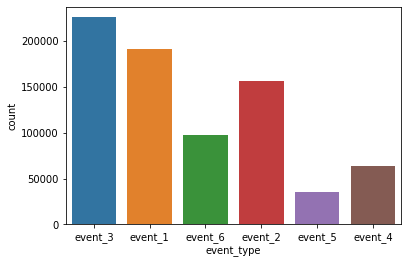

In [25]:
# Boxplot - Conflict Fatalities
sns.countplot(x='event_type', data=acled)

Text(0, 0.5, 'Frequency')

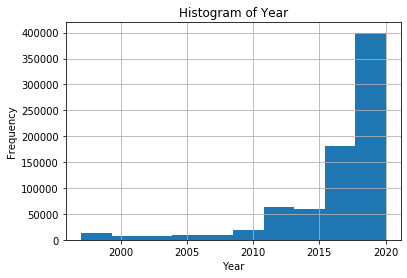

In [26]:
# Histogram
acled.year.hist()
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

## 3. Summarize the Dataset

In [27]:
wdi_data_countries = wdi_data['country'].unique()
acled_data_countries = acled_data['country'].unique()
print("Countries in ACLED Dataset not listed in WDI Data. These countries will either have their names adjusted to match the WDI Dataset or treated accordingly.:")
list(set(acled_data_countries) - set(wdi_data_countries))
#wdi['Country Name'].nunique()

Countries in ACLED Dataset not listed in WDI Data. These countries will either have their names adjusted to match the WDI Dataset or treated accordingly.:


[]

In [28]:
# Class Distribution
acled_data.groupby('year').size()

year
1997.0     48
1998.0     48
1999.0     46
2000.0     48
2001.0     47
2002.0     47
2003.0     48
2004.0     48
2005.0     47
2006.0     48
2007.0     47
2008.0     47
2009.0     48
2010.0     57
2011.0     57
2012.0     57
2013.0     57
2014.0     58
2015.0     61
2016.0     73
2017.0     76
2018.0    101
2019.0    137
2020.0    141
dtype: int64

In [29]:
acled_data[acled_data.country == "Philippines"]

,country,year,conflict_instances_event_1,conflict_instances_event_2,conflict_instances_event_3,conflict_instances_event_4,conflict_instances_event_5,conflict_instances_event_6,conflict_fatalities_event_1,conflict_fatalities_event_2,conflict_fatalities_event_3,conflict_fatalities_event_4,conflict_fatalities_event_5,conflict_fatalities_event_6,conflict_instances_total,conflict_fatalities_total
1066,Philippines,2016.0,382.0,118.0,175.0,13.0,100.0,2406.0,856.0,67.0,4.0,5.0,1.0,3269.0,3194.0,4202.0
1067,Philippines,2017.0,673.0,96.0,355.0,22.0,123.0,1628.0,1955.0,64.0,0.0,2.0,0.0,2067.0,2897.0,4088.0
1068,Philippines,2018.0,463.0,92.0,151.0,1.0,104.0,975.0,589.0,37.0,0.0,0.0,0.0,1161.0,1786.0,1787.0
1069,Philippines,2019.0,389.0,58.0,304.0,11.0,103.0,966.0,514.0,48.0,0.0,4.0,0.0,1056.0,1831.0,1622.0
1070,Philippines,2020.0,156.0,3.0,99.0,4.0,52.0,306.0,184.0,1.0,0.0,0.0,0.0,348.0,620.0,533.0


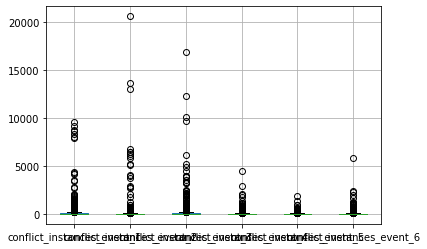

In [30]:
# Boxplot - Conflict Instances
df = pd.DataFrame(acled_data, columns=['conflict_instances_event_1', 'conflict_instances_event_2', 'conflict_instances_event_3', 'conflict_instances_event_4', 'conflict_instances_event_5', 'conflict_instances_event_6'])
boxplot = df.boxplot(column=['conflict_instances_event_1', 'conflict_instances_event_2', 'conflict_instances_event_3', 'conflict_instances_event_4', 'conflict_instances_event_5', 'conflict_instances_event_6'])

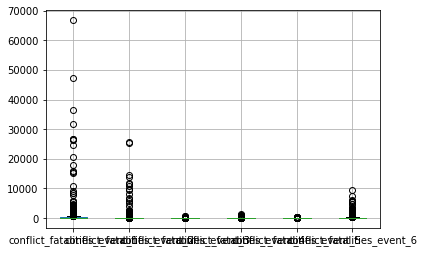

In [31]:
# Boxplot - Conflict Fatalities
df = pd.DataFrame(acled_data, columns=['conflict_fatalities_event_1', 'conflict_fatalities_event_2', 'conflict_fatalities_event_3', 'conflict_fatalities_event_4', 'conflict_fatalities_event_5', 'conflict_fatalities_event_6'])
boxplot = df.boxplot(column=['conflict_fatalities_event_1', 'conflict_fatalities_event_2', 'conflict_fatalities_event_3', 'conflict_fatalities_event_4', 'conflict_fatalities_event_5', 'conflict_fatalities_event_6'])

# Transform Dataset

In [32]:
# Merge WDI and ACLED Data
final_data = pd.merge(wdi_data, acled_data, how='left', left_on=['country', 'year'], right_on=['country', 'year'])
conflict_instances = ['conflict_instances_event_1', 'conflict_instances_event_2', 'conflict_instances_event_3', 'conflict_instances_event_4', 'conflict_instances_event_5', 'conflict_instances_event_6', 'conflict_instances_total']
conflict_fatalities = ['conflict_fatalities_event_1', 'conflict_fatalities_event_2', 'conflict_fatalities_event_3', 'conflict_fatalities_event_4', 'conflict_fatalities_event_5', 'conflict_fatalities_event_6', 'conflict_fatalities_total']
final_data[conflict_instances] = final_data[conflict_instances].replace(np.nan, 0)
final_data[conflict_fatalities] = final_data[conflict_fatalities].replace(np.nan, 0)
final_data = final_data.fillna(method='ffill')
#final_data.set_index(['country', 'year'])
final_data

,country,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,AG.LND.TOTL.K2,AG.LND.TOTL.RU.K2,AG.LND.TOTL.UR.K2,AG.LND.TRAC.ZS,AG.PRD.CREL.MT,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,AG.SRF.TOTL.K2,AG.YLD.CREL.KG,BG.GSR.NFSV.GD.ZS,BM.GSR.CMCP.ZS,BM.GSR.FCTY.CD,BM.GSR.GNFS.CD,BM.GSR.INSF.ZS,BM.GSR.MRCH.CD,BM.GSR.NFSV.CD,BM.GSR.ROYL.CD,BM.GSR.TOTL.CD,BM.GSR.TRAN.ZS,BM.GSR.TRVL.ZS,BM.KLT.DINV.CD.WD,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PRVT.CD,BM.TRF.PWKR.CD.DT,BN.CAB.XOKA.CD,BN.CAB.XOKA.GD.ZS,BN.FIN.TOTL.CD,BN.GSR.FCTY.CD,BN.GSR.GNFS.CD,BN.GSR.MRCH.CD,BN.KAC.EOMS.CD,BN.KLT.DINV.CD,BN.KLT.PTXL.CD,BN.RES.INCL.CD,BN.TRF.CURR.CD,BN.TRF.KOGT.CD,BX.GRT.EXTA.CD.WD,BX.GRT.TECH.CD.WD,BX.GSR.CCIS.CD,BX.GSR.CCIS.ZS,BX.GSR.CMCP.ZS,BX.GSR.FCTY.CD,BX.GSR.GNFS.CD,BX.GSR.INSF.ZS,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,BX.GSR.ROYL.CD,BX.GSR.TOTL.CD,BX.GSR.TRAN.ZS,BX.GSR.TRVL.ZS,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.PEF.TOTL.CD.WD,BX.TRF.CURR.CD,BX.TRF.PWKR.CD,BX.TRF.PWKR.CD.DT,BX.TRF.PWKR.DT.GD.ZS,CM.MKT.INDX.ZG,CM.MKT.LCAP.CD,CM.MKT.LCAP.GD.ZS,CM.MKT.LDOM.NO,CM.MKT.TRAD.CD,CM.MKT.TRAD.GD.ZS,CM.MKT.TRNR,DC.DAC.AUSL.CD,DC.DAC.AUTL.CD,DC.DAC.BELL.CD,DC.DAC.CANL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,DC.DAC.CZEL.CD,DC.DAC.DEUL.CD,DC.DAC.DNKL.CD,DC.DAC.ESPL.CD,DC.DAC.FINL.CD,DC.DAC.FRAL.CD,DC.DAC.GBRL.CD,DC.DAC.GRCL.CD,DC.DAC.HUNL.CD,DC.DAC.IRLL.CD,DC.DAC.ISLL.CD,DC.DAC.ITAL.CD,DC.DAC.JPNL.CD,DC.DAC.KORL.CD,DC.DAC.LUXL.CD,DC.DAC.NLDL.CD,DC.DAC.NORL.CD,DC.DAC.NZLL.CD,DC.DAC.POLL.CD,DC.DAC.PRTL.CD,DC.DAC.SVKL.CD,DC.DAC.SVNL.CD,DC.DAC.SWEL.CD,DC.DAC.TOTL.CD,DC.DAC.USAL.CD,DC.ODA.TLDC.CD,DC.ODA.TLDC.GN.ZS,DC.ODA.TOTL.CD,DC.ODA.TOTL.GN.ZS,DC.ODA.TOTL.KD,DT.DOD.DECT.CD,DT.DOD.DECT.GN.ZS,DT.DOD.DIMF.CD,DT.DOD.DLXF.CD,DT.DOD.DPNG.CD,DT.DOD.DPPG.CD,DT.DOD.DSTC.CD,DT.DOD.DSTC.IR.ZS,DT.DOD.DSTC.XP.ZS,DT.DOD.DSTC.ZS,DT.DOD.MIBR.CD,DT.DOD.MIDA.CD,DT.DOD.MWBG.CD,DT.DOD.PVLX.CD,DT.DOD.PVLX.EX.ZS,DT.DOD.PVLX.GN.ZS,DT.NFL.BLAT.CD,DT.NFL.BOND.CD,DT.NFL.DPNG.CD,DT.NFL.FAOG.CD,DT.NFL.IAEA.CD,DT.NFL.IFAD.CD,DT.NFL.ILOG.CD,DT.NFL.IMFC.CD,DT.NFL.IMFN.CD,DT.NFL.MIBR.CD,DT.NFL.MIDA.CD,DT.NFL.MLAT.CD,DT.NFL.MOTH.CD,DT.NFL.NIFC.CD,DT.NFL.OFFT.CD,DT.NFL.PBND.CD,DT.NFL.PCBK.CD,DT.NFL.PCBO.CD,DT.NFL.PNGB.CD,DT.NFL.PNGC.CD,DT.NFL.PROP.CD,DT.NFL.PRVT.CD,DT.NFL.RDBC.CD,DT.NFL.RDBN.CD,DT.NFL.UNAI.CD,DT.NFL.UNCF.CD,DT.NFL.UNCR.CD,DT.NFL.UNDP.CD,DT.NFL.UNEC.CD,DT.NFL.UNEP.CD,DT.NFL.UNFP.CD,DT.NFL.UNPB.CD,DT.NFL.UNRW.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD,DT.NFL.WFPG.CD,DT.NFL.WHOL.CD,DT.ODA.ALLD.CD,DT.ODA.ALLD.KD,DT.ODA.OATL.CD,DT.ODA.OATL.KD,DT.ODA.ODAT.CD,DT.ODA.ODAT.GI.ZS,DT.ODA.ODAT.GN.ZS,DT.ODA.ODAT.KD,DT.ODA.ODAT.MP.ZS,DT.ODA.ODAT.PC.ZS,DT.ODA.ODAT.XP.ZS,DT.TDS.DECT.CD,DT.TDS.DECT.EX.ZS,DT.TDS.DECT.GN.ZS,DT.TDS.DIMF.CD,DT.TDS.DPPF.XP.ZS,DT.TDS.DPPG.CD,DT.TDS.DPPG.GN.ZS,DT.TDS.DPPG.XP.ZS,DT.TDS.MLAT.CD,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.LOSS.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.GDP.PUSE.KO.PP.KD,EG.IMP.CONS.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.CRNW.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.GHGO.ZG,EN.ATM.GHGT.KT.CE,EN.ATM.GHGT.ZG,EN.ATM.HFCG.KT.CE,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.AG.ZS,EN.ATM.METH.EG.KT.CE,EN.ATM.METH.EG.ZS,EN.ATM.METH.KT.CE,EN.ATM.METH.ZG,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.AG.ZS,EN.ATM.NOXE.EG.KT.CE,EN.ATM.NOXE.EG.ZS,EN.ATM.NOXE.KT.CE,EN.ATM.NOXE.ZG,...,SM.POP.NETM,S

In [33]:
dictionary_series['BX.GRT.TECH.CD.WD']

{'Series Name': 'Technical cooperation grants (BoP, current US$)'}

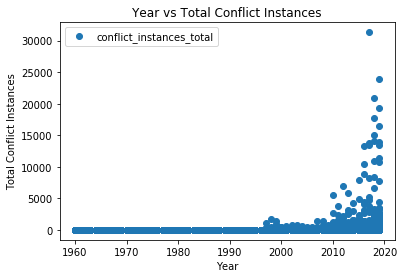

In [34]:
final_data.plot(x='year', y='conflict_instances_total', style='o')  
plt.title('Year vs Total Conflict Instances')  
plt.xlabel('Year')  
plt.ylabel('Total Conflict Instances')  
plt.show()

### Outcome Variables
The categorical value, <categorical_conflict_instances>, is a binary variable with a value of 0 being no conflict events and 1 being at least one conflict event of any kind occurring. The continuous value, <continuous_conflict_instances>, is a continuous variable taking the value of the number of conflict events of any kind occurring.

In [35]:
# Generate Categorical and Continuous Outcome Variables
final_data['categorical_conflict_instances'] = 0
final_data.loc[final_data.conflict_instances_total !=0, 'categorical_conflict_instances'] = 1
final_data['continuous_conflict_instances'] = final_data['conflict_instances_total'] 

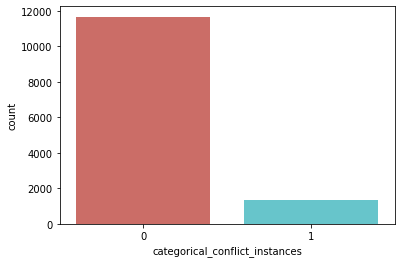

In [36]:
sns.countplot(x='categorical_conflict_instances', data=final_data, palette='hls')
plt.show()

In [37]:
count_no_conflict = len(final_data[final_data['categorical_conflict_instances']==0])
count_conflict = len(final_data[final_data['categorical_conflict_instances']==1])
percentage_no_conflict = count_no_conflict/(count_no_conflict+count_conflict)
print("Percentage of Countries and Years with No Conflict", percentage_no_conflict*100)
percentage_conflict = count_conflict/(count_no_conflict+count_conflict)
print("Percentage of Countries and Years with Conflict", percentage_conflict*100)

Percentage of Countries and Years with No Conflict 89.6236559139785
Percentage of Countries and Years with Conflict 10.376344086021504


### Considerations
1. Classes are imbalanced
2. Data is not available for all countries and years present in the WDI Data

In [38]:
final_data.groupby('categorical_conflict_instances').mean()

,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,AG.LND.TOTL.K2,AG.LND.TOTL.RU.K2,AG.LND.TOTL.UR.K2,AG.LND.TRAC.ZS,AG.PRD.CREL.MT,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,AG.SRF.TOTL.K2,AG.YLD.CREL.KG,BG.GSR.NFSV.GD.ZS,BM.GSR.CMCP.ZS,BM.GSR.FCTY.CD,BM.GSR.GNFS.CD,BM.GSR.INSF.ZS,BM.GSR.MRCH.CD,BM.GSR.NFSV.CD,BM.GSR.ROYL.CD,BM.GSR.TOTL.CD,BM.GSR.TRAN.ZS,BM.GSR.TRVL.ZS,BM.KLT.DINV.CD.WD,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PRVT.CD,BM.TRF.PWKR.CD.DT,BN.CAB.XOKA.CD,BN.CAB.XOKA.GD.ZS,BN.FIN.TOTL.CD,BN.GSR.FCTY.CD,BN.GSR.GNFS.CD,BN.GSR.MRCH.CD,BN.KAC.EOMS.CD,BN.KLT.DINV.CD,BN.KLT.PTXL.CD,BN.RES.INCL.CD,BN.TRF.CURR.CD,BN.TRF.KOGT.CD,BX.GRT.EXTA.CD.WD,BX.GRT.TECH.CD.WD,BX.GSR.CCIS.CD,BX.GSR.CCIS.ZS,BX.GSR.CMCP.ZS,BX.GSR.FCTY.CD,BX.GSR.GNFS.CD,BX.GSR.INSF.ZS,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,BX.GSR.ROYL.CD,BX.GSR.TOTL.CD,BX.GSR.TRAN.ZS,BX.GSR.TRVL.ZS,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.PEF.TOTL.CD.WD,BX.TRF.CURR.CD,BX.TRF.PWKR.CD,BX.TRF.PWKR.CD.DT,BX.TRF.PWKR.DT.GD.ZS,CM.MKT.INDX.ZG,CM.MKT.LCAP.CD,CM.MKT.LCAP.GD.ZS,CM.MKT.LDOM.NO,CM.MKT.TRAD.CD,CM.MKT.TRAD.GD.ZS,CM.MKT.TRNR,DC.DAC.AUSL.CD,DC.DAC.AUTL.CD,DC.DAC.BELL.CD,DC.DAC.CANL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,DC.DAC.CZEL.CD,DC.DAC.DEUL.CD,DC.DAC.DNKL.CD,DC.DAC.ESPL.CD,DC.DAC.FINL.CD,DC.DAC.FRAL.CD,DC.DAC.GBRL.CD,DC.DAC.GRCL.CD,DC.DAC.HUNL.CD,DC.DAC.IRLL.CD,DC.DAC.ISLL.CD,DC.DAC.ITAL.CD,DC.DAC.JPNL.CD,DC.DAC.KORL.CD,DC.DAC.LUXL.CD,DC.DAC.NLDL.CD,DC.DAC.NORL.CD,DC.DAC.NZLL.CD,DC.DAC.POLL.CD,DC.DAC.PRTL.CD,DC.DAC.SVKL.CD,DC.DAC.SVNL.CD,DC.DAC.SWEL.CD,DC.DAC.TOTL.CD,DC.DAC.USAL.CD,DC.ODA.TLDC.CD,DC.ODA.TLDC.GN.ZS,DC.ODA.TOTL.CD,DC.ODA.TOTL.GN.ZS,DC.ODA.TOTL.KD,DT.DOD.DECT.CD,DT.DOD.DECT.GN.ZS,DT.DOD.DIMF.CD,DT.DOD.DLXF.CD,DT.DOD.DPNG.CD,DT.DOD.DPPG.CD,DT.DOD.DSTC.CD,DT.DOD.DSTC.IR.ZS,DT.DOD.DSTC.XP.ZS,DT.DOD.DSTC.ZS,DT.DOD.MIBR.CD,DT.DOD.MIDA.CD,DT.DOD.MWBG.CD,DT.DOD.PVLX.CD,DT.DOD.PVLX.EX.ZS,DT.DOD.PVLX.GN.ZS,DT.NFL.BLAT.CD,DT.NFL.BOND.CD,DT.NFL.DPNG.CD,DT.NFL.FAOG.CD,DT.NFL.IAEA.CD,DT.NFL.IFAD.CD,DT.NFL.ILOG.CD,DT.NFL.IMFC.CD,DT.NFL.IMFN.CD,DT.NFL.MIBR.CD,DT.NFL.MIDA.CD,DT.NFL.MLAT.CD,DT.NFL.MOTH.CD,DT.NFL.NIFC.CD,DT.NFL.OFFT.CD,DT.NFL.PBND.CD,DT.NFL.PCBK.CD,DT.NFL.PCBO.CD,DT.NFL.PNGB.CD,DT.NFL.PNGC.CD,DT.NFL.PROP.CD,DT.NFL.PRVT.CD,DT.NFL.RDBC.CD,DT.NFL.RDBN.CD,DT.NFL.UNAI.CD,DT.NFL.UNCF.CD,DT.NFL.UNCR.CD,DT.NFL.UNDP.CD,DT.NFL.UNEC.CD,DT.NFL.UNEP.CD,DT.NFL.UNFP.CD,DT.NFL.UNPB.CD,DT.NFL.UNRW.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD,DT.NFL.WFPG.CD,DT.NFL.WHOL.CD,DT.ODA.ALLD.CD,DT.ODA.ALLD.KD,DT.ODA.OATL.CD,DT.ODA.OATL.KD,DT.ODA.ODAT.CD,DT.ODA.ODAT.GI.ZS,DT.ODA.ODAT.GN.ZS,DT.ODA.ODAT.KD,DT.ODA.ODAT.MP.ZS,DT.ODA.ODAT.PC.ZS,DT.ODA.ODAT.XP.ZS,DT.TDS.DECT.CD,DT.TDS.DECT.EX.ZS,DT.TDS.DECT.GN.ZS,DT.TDS.DIMF.CD,DT.TDS.DPPF.XP.ZS,DT.TDS.DPPG.CD,DT.TDS.DPPG.GN.ZS,DT.TDS.DPPG.XP.ZS,DT.TDS.MLAT.CD,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.LOSS.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.GDP.PUSE.KO.PP.KD,EG.IMP.CONS.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.CRNW.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.GHGO.ZG,EN.ATM.GHGT.KT.CE,EN.ATM.GHGT.ZG,EN.ATM.HFCG.KT.CE,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.AG.ZS,EN.ATM.METH.EG.KT.CE,EN.ATM.METH.EG.ZS,EN.ATM.METH.KT.CE,EN.ATM.METH.ZG,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.AG.ZS,EN.ATM.NOXE.EG.KT.CE,EN.ATM.NOXE.EG.ZS,EN.ATM.NOXE.KT.CE,EN.ATM.NOXE.ZG,EN.ATM.PFCG.KT.CE,...,SM.

## Train-Test Data

In [39]:
# Encoding Country Variable
le = preprocessing.LabelEncoder()
final_data['country'] = le.fit_transform(final_data['country'])

In [40]:
final_data_country_year = final_data.iloc[0:,:2]
final_data_values = final_data.iloc[0:,2:-16]
final_data_outcome = final_data.iloc[0:,-16:]
final_data_values

,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.UR.ZS,AG.LND.EL5M.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,AG.LND.TOTL.K2,AG.LND.TOTL.RU.K2,AG.LND.TOTL.UR.K2,AG.LND.TRAC.ZS,AG.PRD.CREL.MT,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.PRD.LVSK.XD,AG.SRF.TOTL.K2,AG.YLD.CREL.KG,BG.GSR.NFSV.GD.ZS,BM.GSR.CMCP.ZS,BM.GSR.FCTY.CD,BM.GSR.GNFS.CD,BM.GSR.INSF.ZS,BM.GSR.MRCH.CD,BM.GSR.NFSV.CD,BM.GSR.ROYL.CD,BM.GSR.TOTL.CD,BM.GSR.TRAN.ZS,BM.GSR.TRVL.ZS,BM.KLT.DINV.CD.WD,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PRVT.CD,BM.TRF.PWKR.CD.DT,BN.CAB.XOKA.CD,BN.CAB.XOKA.GD.ZS,BN.FIN.TOTL.CD,BN.GSR.FCTY.CD,BN.GSR.GNFS.CD,BN.GSR.MRCH.CD,BN.KAC.EOMS.CD,BN.KLT.DINV.CD,BN.KLT.PTXL.CD,BN.RES.INCL.CD,BN.TRF.CURR.CD,BN.TRF.KOGT.CD,BX.GRT.EXTA.CD.WD,BX.GRT.TECH.CD.WD,BX.GSR.CCIS.CD,BX.GSR.CCIS.ZS,BX.GSR.CMCP.ZS,BX.GSR.FCTY.CD,BX.GSR.GNFS.CD,BX.GSR.INSF.ZS,BX.GSR.MRCH.CD,BX.GSR.NFSV.CD,BX.GSR.ROYL.CD,BX.GSR.TOTL.CD,BX.GSR.TRAN.ZS,BX.GSR.TRVL.ZS,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.PEF.TOTL.CD.WD,BX.TRF.CURR.CD,BX.TRF.PWKR.CD,BX.TRF.PWKR.CD.DT,BX.TRF.PWKR.DT.GD.ZS,CM.MKT.INDX.ZG,CM.MKT.LCAP.CD,CM.MKT.LCAP.GD.ZS,CM.MKT.LDOM.NO,CM.MKT.TRAD.CD,CM.MKT.TRAD.GD.ZS,CM.MKT.TRNR,DC.DAC.AUSL.CD,DC.DAC.AUTL.CD,DC.DAC.BELL.CD,DC.DAC.CANL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,DC.DAC.CZEL.CD,DC.DAC.DEUL.CD,DC.DAC.DNKL.CD,DC.DAC.ESPL.CD,DC.DAC.FINL.CD,DC.DAC.FRAL.CD,DC.DAC.GBRL.CD,DC.DAC.GRCL.CD,DC.DAC.HUNL.CD,DC.DAC.IRLL.CD,DC.DAC.ISLL.CD,DC.DAC.ITAL.CD,DC.DAC.JPNL.CD,DC.DAC.KORL.CD,DC.DAC.LUXL.CD,DC.DAC.NLDL.CD,DC.DAC.NORL.CD,DC.DAC.NZLL.CD,DC.DAC.POLL.CD,DC.DAC.PRTL.CD,DC.DAC.SVKL.CD,DC.DAC.SVNL.CD,DC.DAC.SWEL.CD,DC.DAC.TOTL.CD,DC.DAC.USAL.CD,DC.ODA.TLDC.CD,DC.ODA.TLDC.GN.ZS,DC.ODA.TOTL.CD,DC.ODA.TOTL.GN.ZS,DC.ODA.TOTL.KD,DT.DOD.DECT.CD,DT.DOD.DECT.GN.ZS,DT.DOD.DIMF.CD,DT.DOD.DLXF.CD,DT.DOD.DPNG.CD,DT.DOD.DPPG.CD,DT.DOD.DSTC.CD,DT.DOD.DSTC.IR.ZS,DT.DOD.DSTC.XP.ZS,DT.DOD.DSTC.ZS,DT.DOD.MIBR.CD,DT.DOD.MIDA.CD,DT.DOD.MWBG.CD,DT.DOD.PVLX.CD,DT.DOD.PVLX.EX.ZS,DT.DOD.PVLX.GN.ZS,DT.NFL.BLAT.CD,DT.NFL.BOND.CD,DT.NFL.DPNG.CD,DT.NFL.FAOG.CD,DT.NFL.IAEA.CD,DT.NFL.IFAD.CD,DT.NFL.ILOG.CD,DT.NFL.IMFC.CD,DT.NFL.IMFN.CD,DT.NFL.MIBR.CD,DT.NFL.MIDA.CD,DT.NFL.MLAT.CD,DT.NFL.MOTH.CD,DT.NFL.NIFC.CD,DT.NFL.OFFT.CD,DT.NFL.PBND.CD,DT.NFL.PCBK.CD,DT.NFL.PCBO.CD,DT.NFL.PNGB.CD,DT.NFL.PNGC.CD,DT.NFL.PROP.CD,DT.NFL.PRVT.CD,DT.NFL.RDBC.CD,DT.NFL.RDBN.CD,DT.NFL.UNAI.CD,DT.NFL.UNCF.CD,DT.NFL.UNCR.CD,DT.NFL.UNDP.CD,DT.NFL.UNEC.CD,DT.NFL.UNEP.CD,DT.NFL.UNFP.CD,DT.NFL.UNPB.CD,DT.NFL.UNRW.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD,DT.NFL.WFPG.CD,DT.NFL.WHOL.CD,DT.ODA.ALLD.CD,DT.ODA.ALLD.KD,DT.ODA.OATL.CD,DT.ODA.OATL.KD,DT.ODA.ODAT.CD,DT.ODA.ODAT.GI.ZS,DT.ODA.ODAT.GN.ZS,DT.ODA.ODAT.KD,DT.ODA.ODAT.MP.ZS,DT.ODA.ODAT.PC.ZS,DT.ODA.ODAT.XP.ZS,DT.TDS.DECT.CD,DT.TDS.DECT.EX.ZS,DT.TDS.DECT.GN.ZS,DT.TDS.DIMF.CD,DT.TDS.DPPF.XP.ZS,DT.TDS.DPPG.CD,DT.TDS.DPPG.GN.ZS,DT.TDS.DPPG.XP.ZS,DT.TDS.MLAT.CD,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.LOSS.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.GDP.PUSE.KO.PP.KD,EG.IMP.CONS.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.CRNW.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.PP.GD.KD,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.GHGO.ZG,EN.ATM.GHGT.KT.CE,EN.ATM.GHGT.ZG,EN.ATM.HFCG.KT.CE,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.AG.ZS,EN.ATM.METH.EG.KT.CE,EN.ATM.METH.EG.ZS,EN.ATM.METH.KT.CE,EN.ATM.METH.ZG,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.AG.ZS,EN.ATM.NOXE.EG.KT.CE,EN.ATM.NOXE.EG.ZS,EN.ATM.NOXE.KT.CE,EN.ATM.NOXE.ZG,EN.ATM.PFCG.KT.CE,EN.ATM.PM25.

In [41]:
# Dropping Features with High Correla
correlated_features = set()
correlation_matrix = final_data_values.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print('Number of Correlated Features', len(correlated_features))
final_data_values.drop(labels=correlated_features, axis=1, inplace=True)

Number of Correlated Features 648


In [42]:
# Removing Columns with Low Variance
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

min_variance = 0.0001
low_variance = variance_threshold_selector(final_data_values, min_variance) 
print('Columns Removed:')
final_data_values.columns ^ low_variance.columns
final_data_values.shape
final_data_values = low_variance

C:\Users\user\Anaconda\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
C:\Users\user\Anaconda\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:88: RuntimeWarning: invalid value encountered in less_equal
  (self.variances_ <= self.threshold)):
C:\Users\user\Anaconda\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:99: RuntimeWarning: invalid value encountered in greater
  return self.variances_ > self.threshold


Columns Removed:


In [43]:
# Scaling Data
names = final_data_values.columns
min_max_scaler = preprocessing.MinMaxScaler()
final_data_values_normalized = min_max_scaler.fit_transform(final_data_values)
final_data_values_normalized = pd.DataFrame(final_data_values_normalized, columns=names)
# Initialise the Scaler 
scaler = StandardScaler() 
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
final_data_values_scaled = scaler.fit_transform(final_data_values_normalized)
final_data_values_scaled = pd.DataFrame(final_data_values_scaled, columns=names)
final_data_preprocessed = pd.concat([final_data_country_year, final_data_values_scaled], axis=1)
final_data_preprocessed = pd.concat([final_data_preprocessed, final_data_outcome], axis=1)
final_data_preprocessed

,country,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.UR.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,AG.LND.TOTL.K2,AG.LND.TRAC.ZS,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.YLD.CREL.KG,BG.GSR.NFSV.GD.ZS,BM.GSR.CMCP.ZS,BM.GSR.FCTY.CD,BM.GSR.INSF.ZS,BM.GSR.ROYL.CD,BM.GSR.TRAN.ZS,BM.GSR.TRVL.ZS,BM.KLT.DINV.CD.WD,BM.KLT.DINV.WD.GD.ZS,BN.CAB.XOKA.CD,BN.CAB.XOKA.GD.ZS,BN.GSR.FCTY.CD,BN.KAC.EOMS.CD,BN.KLT.DINV.CD,BN.KLT.PTXL.CD,BN.RES.INCL.CD,BN.TRF.CURR.CD,BN.TRF.KOGT.CD,BX.GRT.EXTA.CD.WD,BX.GRT.TECH.CD.WD,BX.GSR.CCIS.CD,BX.GSR.CCIS.ZS,BX.GSR.CMCP.ZS,BX.GSR.INSF.ZS,BX.GSR.ROYL.CD,BX.GSR.TRAN.ZS,BX.GSR.TRVL.ZS,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.PEF.TOTL.CD.WD,BX.TRF.PWKR.CD,BX.TRF.PWKR.DT.GD.ZS,CM.MKT.INDX.ZG,CM.MKT.LCAP.CD,CM.MKT.LCAP.GD.ZS,CM.MKT.LDOM.NO,CM.MKT.TRNR,DC.DAC.AUSL.CD,DC.DAC.AUTL.CD,DC.DAC.BELL.CD,DC.DAC.CANL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,DC.DAC.CZEL.CD,DC.DAC.DEUL.CD,DC.DAC.DNKL.CD,DC.DAC.ESPL.CD,DC.DAC.FINL.CD,DC.DAC.FRAL.CD,DC.DAC.GBRL.CD,DC.DAC.GRCL.CD,DC.DAC.HUNL.CD,DC.DAC.IRLL.CD,DC.DAC.ISLL.CD,DC.DAC.ITAL.CD,DC.DAC.JPNL.CD,DC.DAC.KORL.CD,DC.DAC.LUXL.CD,DC.DAC.NLDL.CD,DC.DAC.NORL.CD,DC.DAC.NZLL.CD,DC.DAC.POLL.CD,DC.DAC.PRTL.CD,DC.DAC.SVKL.CD,DC.DAC.SVNL.CD,DC.DAC.SWEL.CD,DC.DAC.USAL.CD,DC.ODA.TLDC.CD,DC.ODA.TLDC.GN.ZS,DT.DOD.DECT.CD,DT.DOD.DECT.GN.ZS,DT.DOD.DIMF.CD,DT.DOD.DSTC.IR.ZS,DT.DOD.DSTC.XP.ZS,DT.DOD.DSTC.ZS,DT.DOD.MIDA.CD,DT.DOD.MWBG.CD,DT.DOD.PVLX.CD,DT.DOD.PVLX.EX.ZS,DT.DOD.PVLX.GN.ZS,DT.NFL.BLAT.CD,DT.NFL.BOND.CD,DT.NFL.DPNG.CD,DT.NFL.FAOG.CD,DT.NFL.IAEA.CD,DT.NFL.IFAD.CD,DT.NFL.ILOG.CD,DT.NFL.IMFC.CD,DT.NFL.IMFN.CD,DT.NFL.MIBR.CD,DT.NFL.MIDA.CD,DT.NFL.MLAT.CD,DT.NFL.MOTH.CD,DT.NFL.NIFC.CD,DT.NFL.PCBK.CD,DT.NFL.PNGB.CD,DT.NFL.PROP.CD,DT.NFL.RDBC.CD,DT.NFL.RDBN.CD,DT.NFL.UNAI.CD,DT.NFL.UNCF.CD,DT.NFL.UNCR.CD,DT.NFL.UNDP.CD,DT.NFL.UNEC.CD,DT.NFL.UNFP.CD,DT.NFL.UNPB.CD,DT.NFL.UNRW.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD,DT.NFL.WFPG.CD,DT.NFL.WHOL.CD,DT.ODA.OATL.CD,DT.ODA.ODAT.GI.ZS,DT.ODA.ODAT.GN.ZS,DT.ODA.ODAT.MP.ZS,DT.ODA.ODAT.PC.ZS,DT.ODA.ODAT.XP.ZS,DT.TDS.DECT.EX.ZS,DT.TDS.DECT.GN.ZS,DT.TDS.DIMF.CD,DT.TDS.DPPF.XP.ZS,DT.TDS.DPPG.GN.ZS,DT.TDS.DPPG.XP.ZS,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.LOSS.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.IMP.CONS.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.CRNW.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.GHGO.ZG,EN.ATM.GHGT.KT.CE,EN.ATM.GHGT.ZG,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.AG.ZS,EN.ATM.METH.EG.ZS,EN.ATM.METH.ZG,EN.ATM.NOXE.AG.ZS,EN.ATM.NOXE.EG.ZS,EN.ATM.NOXE.ZG,EN.ATM.PFCG.KT.CE,EN.ATM.PM25.MC.M3,EN.ATM.PM25.MC.T3.ZS,EN.ATM.PM25.MC.ZS,EN.BIR.THRD.NO,EN.CLC.DRSK.XQ,EN.CLC.GHGR.MT.CE,EN.CLC.MDAT.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.FSH.THRD.NO,EN.HPT.THRD.NO,EN.POP.DNST,EN.POP.EL5M.RU.ZS,EN.POP.EL5M.UR.ZS,EN.POP.SLUM.UR.ZS,EN.URB.LCTY,EN.URB.LCTY.UR.ZS,EN.URB.MCTY,EN.URB.MCTY.TL.ZS,EP.PMP.DESL.CD,ER.FSH.CAPT.MT,ER.GDP.FWTL.M3.KD,ER.H2O.FWAG.ZS,ER.H2O.FWDM.ZS,ER.H2O.FWIN.ZS,ER.H2O.FWST.ZS,ER.H2O.FWTL.K3,ER.H2O.FWTL.ZS,ER.H2O.INTR.K3,ER.H2O.INTR.PC,ER.LND.PTLD.ZS,ER.MRN.PTMR.ZS,ER.PTD.TOTL.ZS,FB.AST.NPER.ZS,FB.ATM.TOTL.P5,FB.BNK.CAPA.ZS,FB.CBK.BRCH.P5,FB.CBK.BRWR.P3,FB.CBK.DPTR.P3,FD.AST.PRVT.GD.ZS,FD.RES.LIQU.AS.ZS,FI.RES.TOTL.CD,FI.RES.TOTL.DT.ZS,FI.RES.TOTL.MO,FM.AST.CGOV.ZG.M3,FM.AST.DOMO.ZG.M3,FM.AST.DOMS.CN,FM.AST.PRVT.ZG.M3,FM.LBL.BMNY.GD.ZS,FM.LBL.BMNY.IR.ZS,FM.LBL.BMNY.ZG,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FP.WPI.TOTL,FR.INR.DPST,FR.INR.RINR,FR.INR.RISK,FS.AST.CGOV.GD.ZS,...,SH.DYN.AIDS.FE.ZS,SH.DYN.AIDS.ZS,SH.DYN.

In [44]:
final_data_x = final_data_preprocessed.iloc[:,:-16]
final_data_y_categorical = final_data_preprocessed[['categorical_conflict_instances']]
final_data_y_continuous = final_data_preprocessed[['continuous_conflict_instances']]
final_data_y_categorical.rename(columns = {'categorical_conflict_instances':'y'}, inplace = True) 
final_data_y_continuous.rename(columns = {'continuous_conflict_instances':'y'}, inplace = True) 
final_data_x = final_data_x.fillna(final_data_x.mean())
final_data_x = final_data_x.dropna(axis = 1,thresh=2)
final_data_x = final_data_x.astype(int)
final_data_x

C:\Users\user\Anaconda\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,AG.LND.EL5M.RU.ZS,AG.LND.EL5M.UR.K2,AG.LND.EL5M.UR.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,AG.LND.TOTL.K2,AG.LND.TRAC.ZS,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,AG.YLD.CREL.KG,BG.GSR.NFSV.GD.ZS,BM.GSR.CMCP.ZS,BM.GSR.FCTY.CD,BM.GSR.INSF.ZS,BM.GSR.ROYL.CD,BM.GSR.TRAN.ZS,BM.GSR.TRVL.ZS,BM.KLT.DINV.CD.WD,BM.KLT.DINV.WD.GD.ZS,BN.CAB.XOKA.CD,BN.CAB.XOKA.GD.ZS,BN.GSR.FCTY.CD,BN.KAC.EOMS.CD,BN.KLT.DINV.CD,BN.KLT.PTXL.CD,BN.RES.INCL.CD,BN.TRF.CURR.CD,BN.TRF.KOGT.CD,BX.GRT.EXTA.CD.WD,BX.GRT.TECH.CD.WD,BX.GSR.CCIS.CD,BX.GSR.CCIS.ZS,BX.GSR.CMCP.ZS,BX.GSR.INSF.ZS,BX.GSR.ROYL.CD,BX.GSR.TRAN.ZS,BX.GSR.TRVL.ZS,BX.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,BX.PEF.TOTL.CD.WD,BX.TRF.PWKR.CD,BX.TRF.PWKR.DT.GD.ZS,CM.MKT.INDX.ZG,CM.MKT.LCAP.CD,CM.MKT.LCAP.GD.ZS,CM.MKT.LDOM.NO,CM.MKT.TRNR,DC.DAC.AUSL.CD,DC.DAC.AUTL.CD,DC.DAC.BELL.CD,DC.DAC.CANL.CD,DC.DAC.CECL.CD,DC.DAC.CHEL.CD,DC.DAC.CZEL.CD,DC.DAC.DEUL.CD,DC.DAC.DNKL.CD,DC.DAC.ESPL.CD,DC.DAC.FINL.CD,DC.DAC.FRAL.CD,DC.DAC.GBRL.CD,DC.DAC.GRCL.CD,DC.DAC.HUNL.CD,DC.DAC.IRLL.CD,DC.DAC.ISLL.CD,DC.DAC.ITAL.CD,DC.DAC.JPNL.CD,DC.DAC.KORL.CD,DC.DAC.LUXL.CD,DC.DAC.NLDL.CD,DC.DAC.NORL.CD,DC.DAC.NZLL.CD,DC.DAC.POLL.CD,DC.DAC.PRTL.CD,DC.DAC.SVKL.CD,DC.DAC.SVNL.CD,DC.DAC.SWEL.CD,DC.DAC.USAL.CD,DC.ODA.TLDC.CD,DC.ODA.TLDC.GN.ZS,DT.DOD.DECT.CD,DT.DOD.DECT.GN.ZS,DT.DOD.DIMF.CD,DT.DOD.DSTC.IR.ZS,DT.DOD.DSTC.XP.ZS,DT.DOD.DSTC.ZS,DT.DOD.MIDA.CD,DT.DOD.MWBG.CD,DT.DOD.PVLX.CD,DT.DOD.PVLX.EX.ZS,DT.DOD.PVLX.GN.ZS,DT.NFL.BLAT.CD,DT.NFL.BOND.CD,DT.NFL.DPNG.CD,DT.NFL.FAOG.CD,DT.NFL.IAEA.CD,DT.NFL.IFAD.CD,DT.NFL.ILOG.CD,DT.NFL.IMFC.CD,DT.NFL.IMFN.CD,DT.NFL.MIBR.CD,DT.NFL.MIDA.CD,DT.NFL.MLAT.CD,DT.NFL.MOTH.CD,DT.NFL.NIFC.CD,DT.NFL.PCBK.CD,DT.NFL.PNGB.CD,DT.NFL.PROP.CD,DT.NFL.RDBC.CD,DT.NFL.RDBN.CD,DT.NFL.UNAI.CD,DT.NFL.UNCF.CD,DT.NFL.UNCR.CD,DT.NFL.UNDP.CD,DT.NFL.UNEC.CD,DT.NFL.UNFP.CD,DT.NFL.UNPB.CD,DT.NFL.UNRW.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD,DT.NFL.WFPG.CD,DT.NFL.WHOL.CD,DT.ODA.OATL.CD,DT.ODA.ODAT.GI.ZS,DT.ODA.ODAT.GN.ZS,DT.ODA.ODAT.MP.ZS,DT.ODA.ODAT.PC.ZS,DT.ODA.ODAT.XP.ZS,DT.TDS.DECT.EX.ZS,DT.TDS.DECT.GN.ZS,DT.TDS.DIMF.CD,DT.TDS.DPPF.XP.ZS,DT.TDS.DPPG.GN.ZS,DT.TDS.DPPG.XP.ZS,DT.TDS.MLAT.PG.ZS,EG.CFT.ACCS.ZS,EG.EGY.PRIM.PP.KD,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.LOSS.ZS,EG.ELC.NGAS.ZS,EG.ELC.NUCL.ZS,EG.ELC.PETR.ZS,EG.ELC.RNEW.ZS,EG.ELC.RNWX.KH,EG.ELC.RNWX.ZS,EG.FEC.RNEW.ZS,EG.GDP.PUSE.KO.PP,EG.IMP.CONS.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.FO.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.CRNW.ZS,EG.USE.ELEC.KH.PC,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KD.GD,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGO.KT.CE,EN.ATM.GHGO.ZG,EN.ATM.GHGT.KT.CE,EN.ATM.GHGT.ZG,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.AG.ZS,EN.ATM.METH.EG.ZS,EN.ATM.METH.ZG,EN.ATM.NOXE.AG.ZS,EN.ATM.NOXE.EG.ZS,EN.ATM.NOXE.ZG,EN.ATM.PFCG.KT.CE,EN.ATM.PM25.MC.M3,EN.ATM.PM25.MC.T3.ZS,EN.ATM.PM25.MC.ZS,EN.BIR.THRD.NO,EN.CLC.DRSK.XQ,EN.CLC.GHGR.MT.CE,EN.CLC.MDAT.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.FSH.THRD.NO,EN.HPT.THRD.NO,EN.POP.DNST,EN.POP.EL5M.RU.ZS,EN.POP.EL5M.UR.ZS,EN.POP.SLUM.UR.ZS,EN.URB.LCTY,EN.URB.LCTY.UR.ZS,EN.URB.MCTY,EN.URB.MCTY.TL.ZS,EP.PMP.DESL.CD,ER.FSH.CAPT.MT,ER.GDP.FWTL.M3.KD,ER.H2O.FWAG.ZS,ER.H2O.FWDM.ZS,ER.H2O.FWIN.ZS,ER.H2O.FWST.ZS,ER.H2O.FWTL.K3,ER.H2O.FWTL.ZS,ER.H2O.INTR.K3,ER.H2O.INTR.PC,ER.LND.PTLD.ZS,ER.MRN.PTMR.ZS,ER.PTD.TOTL.ZS,FB.AST.NPER.ZS,FB.ATM.TOTL.P5,FB.BNK.CAPA.ZS,FB.CBK.BRCH.P5,FB.CBK.BRWR.P3,FB.CBK.DPTR.P3,FD.AST.PRVT.GD.ZS,FD.RES.LIQU.AS.ZS,FI.RES.TOTL.CD,FI.RES.TOTL.DT.ZS,FI.RES.TOTL.MO,FM.AST.CGOV.ZG.M3,FM.AST.DOMO.ZG.M3,FM.AST.DOMS.CN,FM.AST.PRVT.ZG.M3,FM.LBL.BMNY.GD.ZS,FM.LBL.BMNY.IR.ZS,FM.LBL.BMNY.ZG,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FP.WPI.TOTL,FR.INR.DPST,FR.INR.RINR,FR.INR.RISK,FS.AST.CGOV.GD.ZS,...,SG.GEN.PARL.ZS,SG.LAW.INDX,SG.TIM.UWRK.F

In [45]:
final_data_x = final_data_x.astype(float)
final_data_y_categorical = final_data_y_categorical.astype(float)
final_data_y_continuous = final_data_y_continuous.astype(float)

In [46]:
X = final_data_x
y = final_data_y_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [47]:
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train.values.ravel())
y_test = lab_enc.fit_transform(y_test.values.ravel())

In [48]:
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (2604, 779)
y_test: (2604,)
X_train: (10416, 779)
y_train: (10416,)


## Classification
For the purposes of this project, supervised machine learning classification models will be used to predict the binary value for<categorical_conflict_instances> with the value of 0 being no conflict events of any kind occurring and 1 being at least one conflict event of any kind occurring.

In [49]:
X = final_data_x
y = final_data_y_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

C:\Users\user\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Logistic Regression
Logistic regression performs classification based on regression to predict the probability of a binary dependent variable, or predict P(Y=1) as a function of X.

#### Synthetic Minority Oversampling Technique (SMOTE)
SMOTE will address issues with imbalance by creating synthetic samples from the minor class, and create new observations from randomly chosen k-nearest neighbors

In [50]:
# Synthetic Minority Oversampling Technique (SMOTE)
os = SMOTE(random_state=0)
columns = X_train.columns
X_oversampled_smote, y_oversampled_smote = os.fit_sample(X_train, y_train)
X_oversampled_smote = pd.DataFrame(data=X_oversampled_smote, columns=columns )
y_oversampled_smote= pd.DataFrame(data=y_oversampled_smote, columns=['y'])

print("Length of Oversampled Data:                            ",len(X_oversampled_smote))
print("Number of No Conflict entries in Oversampled Data:     ",len(y_oversampled_smote[y_oversampled_smote['y']==0]))
print("Number of Conflict entries in Oversampled Data:        ",len(y_oversampled_smote[y_oversampled_smote['y']==1]))
print("Proportion of No Conflict entries in Oversampled Data: ",len(y_oversampled_smote[y_oversampled_smote['y']==0])/len(X_oversampled_smote))
print("Proportion of Conflict entries in Oversampled Data:    ",len(y_oversampled_smote[y_oversampled_smote['y']==1])/len(X_oversampled_smote))

Length of Oversampled Data:                             18680
Number of No Conflict entries in Oversampled Data:      9340
Number of Conflict entries in Oversampled Data:         9340
Proportion of No Conflict entries in Oversampled Data:  0.5
Proportion of Conflict entries in Oversampled Data:     0.5


### Adaptive Synthetic (ADASYN)
ADASYN will address issues with imbalance in a similar method to SMOTE, in addition to, adding random small values to points to generate slightly more variance.

In [51]:
# Adaptive Synthetic (ADASYN)
os = ADASYN(random_state=0)
columns = X_train.columns
X_oversampled_adasyn, y_oversampled_adasyn = os.fit_sample(X_train, y_train)
X_oversampled_adasyn = pd.DataFrame(data=X_oversampled_adasyn, columns=columns )
y_oversampled_adasyn = pd.DataFrame(data=y_oversampled_adasyn, columns=['y'])

print("Length of Oversampled Data:                            ",len(X_oversampled_adasyn))
print("Number of No Conflict entries in Oversampled Data:     ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==0]))
print("Number of Conflict entries in Oversampled Data:        ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==1]))
print("Proportion of No Conflict entries in Oversampled Data: ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==0])/len(X_oversampled_adasyn))
print("Proportion of Conflict entries in Oversampled Data:    ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==1])/len(X_oversampled_adasyn))

Length of Oversampled Data:                             18768
Number of No Conflict entries in Oversampled Data:      9340
Number of Conflict entries in Oversampled Data:         9428
Proportion of No Conflict entries in Oversampled Data:  0.49765558397271953
Proportion of Conflict entries in Oversampled Data:     0.5023444160272805


#### Recursive Feature Elimination (RFE)
RFE will select features by repeatedly construct a model and choose either the best or worst performing the feature, setting the feature aside, and repeating the process with the rest of the features.

In [52]:
"""
final_data_variables = final_data.columns.values.tolist()
y_=['y']
X_=[i for i in final_data if i not in y]

model = LogisticRegression()
rfe = RFE(model, 20)
rfe = rfe.fit(X_oversampled_smote, y_oversampled_smote.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
"""

"\nfinal_data_variables = final_data.columns.values.tolist()\ny_=['y']\nX_=[i for i in final_data if i not in y]\n\nmodel = LogisticRegression()\nrfe = RFE(model, 20)\nrfe = rfe.fit(X_oversampled_smote, y_oversampled_smote.values.ravel())\nprint(rfe.support_)\nprint(rfe.ranking_)\n"

#### Logistic Regression

In [53]:
# Create and Fit Model
model_logistic = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# Model Prediction
y_prediction = model_logistic.predict(X_test)

In [54]:
# Classification Report
classification_report_logistic_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_logistic_table = pd.DataFrame(classification_report_logistic_table).transpose()
classification_report_logistic_table

,precision,recall,f1-score,support
0,0.979193,0.990125,0.984629,2329.00000
1,0.907631,0.821818,0.862595,275.00000
accuracy,0.972350,0.972350,0.972350,0.97235
macro avg,0.943412,0.905971,0.923612,2604.00000
weighted avg,0.971636,0.972350,0.971741,2604.00000


In [55]:
# Coefficients
model_coefficients_logistic_table = pd.DataFrame(model_logistic.coef_.flatten(), X_train.columns, columns=['Coefficient'])
model_coefficients_logistic_table

,Coefficient
country,-0.018912
year,-0.002466
AG.AGR.TRAC.NO,-0.393790
AG.CON.FERT.PT.ZS,-0.253272
AG.CON.FERT.ZS,-0.355733
...,...
per_sa_allsa.adq_pop_tot,-0.288513
per_sa_allsa.ben_q1_tot,0.440774
per_sa_allsa.cov_pop_tot,-0.075417
per_si_allsi.ben_q1_tot,-0.321985


In [56]:
# Confusion Matrix
model_confusion_matrix_logistic = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_logistic

array([[2306,   23],
       [  49,  226]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

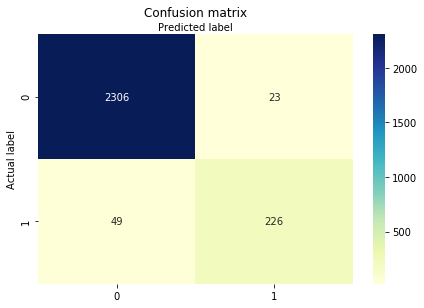

In [57]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_logistic))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

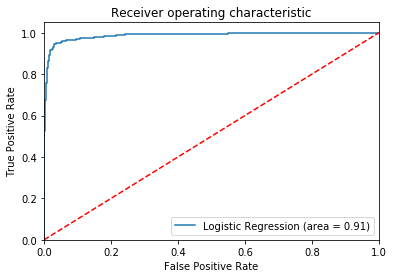

In [58]:
# ROC Curve
roc_auc_logistic = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Observations
1. Need to explore categorical means of independent variables comparing between both categories of conflict and no conflict.
2. This model grants us 2306 + 226 correct predictions and 49 + 23 incorrect predictions. We can see that the model is overfitted.

### Considerations
1. Model is overfitted. Need to minimize number of input variables to only meaningful variables
2. High level of multicollinearity. Need to minimize number of input variables so that variables are independent of each other.
3. Need to transform much of the data into categorical for better modelling

### K-Nearest Neighbors (K-NN)
K-Nearest Neighbors performs classification by identifying data points separated into classess to predict the classification of a new data point based on similarity measure.

In [59]:
# Create and Train Model
model_knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean').fit(X_train,y_train)

# Model Prediction
y_prediction = model_knn.predict(X_test)

# Model Results
model_results = [['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_knn = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_knn

,Evaluation Metric,Value
0,Accuracy,0.974654


In [60]:
# Classification Report
classification_report_knn_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_knn_table = pd.DataFrame(classification_report_knn_table).transpose()
classification_report_knn_table

,precision,recall,f1-score,support
0,0.977225,0.994848,0.985957,2329.000000
1,0.948498,0.803636,0.870079,275.000000
accuracy,0.974654,0.974654,0.974654,0.974654
macro avg,0.962861,0.899242,0.928018,2604.000000
weighted avg,0.974191,0.974654,0.973720,2604.000000


In [61]:
# Confusion Matrix
model_confusion_matrix_knn = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_knn

array([[2317,   12],
       [  54,  221]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

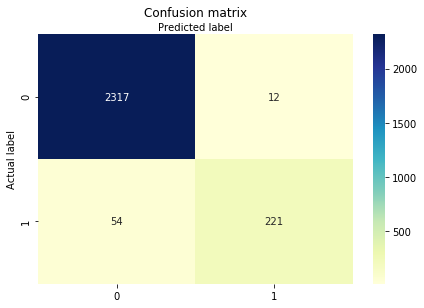

In [62]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_knn))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

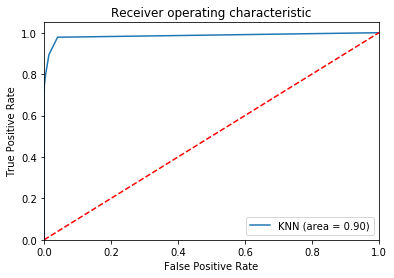

In [63]:
# ROC Curve
roc_auc_knn = roc_auc_score(y_test, model_knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

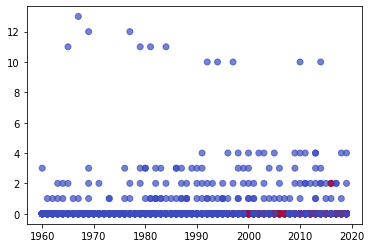

In [64]:
# Scatter Plot
plt.scatter(
    X_test['year'],
    X_test['AG.AGR.TRAC.NO'],
    c=y_prediction,
    cmap='coolwarm',
    alpha=0.7
)

#### k-Fold Cross-Validation
k-Fold Cross-Validation randomly splits up the dataset into 'k' groups with one used as the test set and the rest used as the training set repeatedly training on the train set and scoring on the test set until each unique group has been used as the test set. 

In [65]:
# Create and Train Model
model_knn_cv = KNeighborsClassifier(n_neighbors=10)

# Train Model with a CV of 10
model_knn_cv_scores = cross_val_score(model_knn_cv, X, y.values.ravel(), cv=10)

In [66]:
# Cross Validation Scores
print("Cross Validation Scores Mean: {}".format(np.mean(model_knn_cv_scores)))
model_cross_validation_scores_table = pd.DataFrame(model_knn_cv_scores, range(1,11), columns=['Score'])
model_cross_validation_scores_table

Cross Validation Scores Mean: 0.8526881720430108


,Score
1,0.899386
2,0.762673
3,0.860215
4,0.906298
5,0.901690
6,0.794931
7,0.870200
8,0.897081
9,0.792627
10,0.841782


In [67]:
# Optimal Value for n_neighbors
knn_neighbors = list(range(1, 50, 2))

kfold_cv_scores = []

# perform 10-fold cross validation
for n in knn_neighbors:
    model_knn_cv = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(model_knn_cv, X, y.values.ravel(), cv=10, scoring='accuracy')
    kfold_cv_scores.append(scores.mean())

In [68]:
# Cross Validation Scores
print("Cross Validation Scores Max:    {}".format(np.max(kfold_cv_scores)))
print("Optimal Value for n_neighbors: ", kfold_cv_scores.index((np.max(kfold_cv_scores))))
model_cross_validation_scores_n_neighbors_table = pd.DataFrame(kfold_cv_scores, range(1,26), columns=['Score'])
model_cross_validation_scores_n_neighbors_table

Cross Validation Scores Max:    0.895468509984639
Optimal Value for n_neighbors:  24


,Score
1,0.808065
2,0.816052
3,0.839862
4,0.844854
5,0.846313
6,0.850000
7,0.854071
8,0.859908
9,0.864977
10,0.866743


Text(0, 0.5, 'Accuracy')

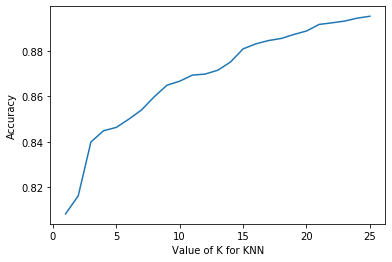

In [69]:
# Accuracy vs k
plt.plot(range(1,26), kfold_cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

Optimal Number of Neighbors: 49


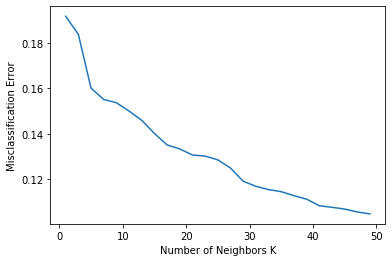

In [70]:
# Misclassification Error
mse = [1 - x for x in kfold_cv_scores]

# Optimal Value for k
optimal_k = knn_neighbors[mse.index(min(mse))]
print("Optimal Number of Neighbors: {}".format(optimal_k))

# Misclassification Error vs k
plt.plot(knn_neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

#### GridSearchCV
GridSearchCV trains the model multiple times on a range of values to find the optimal value for n_neighbors.

In [71]:
# Create and Train Model
model_knn = KNeighborsClassifier()

# Create a Dictionary of all values to test for n_neighbors
knn_neighbors = {"n_neighbors": np.arange(1, 25)}

# Implement GridSearchCV to test all values for n_neighbors
model_gridsearchcv = GridSearchCV(model_knn, knn_neighbors, cv=10)

# Fit Model
model_gridsearchcv.fit(X, y.values.ravel())

# Top Performing value for n_neighbors
print("Optimal Value (n_neighbors):               ", model_gridsearchcv.best_params_)

# Mean Score of Top Performing value for n_neighbors
print("Mean Score of Optimal Value (n_neighbors): ", model_gridsearchcv.best_score_)

Optimal Value (n_neighbors):                {'n_neighbors': 24}
Mean Score of Optimal Value (n_neighbors):  0.8743471582181259


In [72]:
# Create and Train Model with n_neighbors set at 24
model_knn = KNeighborsClassifier(n_neighbors = 24, metric='euclidean').fit(X_train,y_train)

# Model Prediction
y_prediction = model_knn.predict(X_test)

# Model Results
model_results = [['AccuracyScore', metrics.accuracy_score(y_test, y_prediction)]]
model_results_knn = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_knn

,Evaluation Metric,Value
0,AccuracyScore,0.950077


In [73]:
# Classification Report
classification_report_knn_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_knn_table = pd.DataFrame(classification_report_knn_table).transpose()
classification_report_knn_table

,precision,recall,f1-score,support
0,0.951169,0.995277,0.972723,2329.000000
1,0.934132,0.567273,0.705882,275.000000
accuracy,0.950077,0.950077,0.950077,0.950077
macro avg,0.942651,0.781275,0.839303,2604.000000
weighted avg,0.949370,0.950077,0.944543,2604.000000


In [74]:
# Confusion Matrix
model_confusion_matrix_knn = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_knn

array([[2318,   11],
       [ 119,  156]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

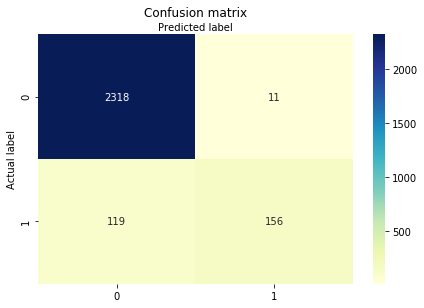

In [75]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_knn))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

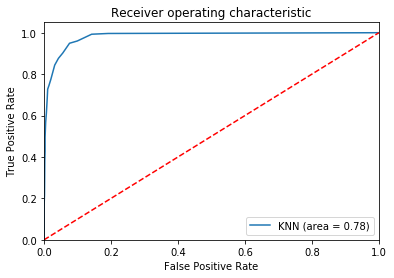

In [76]:
# ROC Curve
roc_auc_knn = roc_auc_score(y_test, model_knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Observations

### Considerations
1. KNN works better for smaller datasets
2. KNN sensitive to irrelevant features, need to trim down variables
3. KNN sensitive to scale of data, need to adjust number of neighbors and scale of data
4. Hypertuning model parameters using GridSearchCV
4. Need to tune k to adjust bias and variance

### Support Vector Machine (SVM)
Support Vector Machines performs classification by finding the hyperplane, or defining decision boundaries separating objects of different classes, that maximizes the margin between different classes.

In [77]:
# Create and Train Model
model_svc = SVC(kernel='linear').fit(X,y.values.ravel())

# Model Prediction
y_prediction = model_svc.predict(X_test)

# Model Results
model_results = [['Score', model_svc.score(X_train, y_train)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_svc = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_svc

,Evaluation Metric,Value
0,Score,0.99904
1,Accuracy,1.00000


### Pipeline
Pipeline sequentially applies a list of transforms and a final estimator.

In [78]:
""""
# Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps)

###
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

###
grid.fit(X_train, y_train)
print ("score = %3.2f", grid.score(X_test, y_test))
print ("best parameters from train data: ", grid.best_params_)
y_pred = grid.predict(X_test)

###
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
grid = GridSearchCV(SVC(), param_grid=parameteres, cv=5)
grid.fit(X_train_scaled, y_train)
"""""

'"\n# Pipeline\nsteps = [(\'scaler\', StandardScaler()), (\'SVM\', SVC(kernel=\'poly\'))]\npipeline = Pipeline(steps)\n\n###\nparameters = {\'SVM__C\':[0.001, 0.1, 100, 10e5], \'SVM__gamma\':[10,1,0.1,0.01]}\ngrid = GridSearchCV(pipeline, param_grid=parameters, cv=5)\n\n###\ngrid.fit(X_train, y_train)\nprint ("score = %3.2f", grid.score(X_test, y_test))\nprint ("best parameters from train data: ", grid.best_params_)\ny_pred = grid.predict(X_test)\n\n###\nscale = StandardScaler().fit(X_train)\nX_train_scaled = scale.transform(X_train)\ngrid = GridSearchCV(SVC(), param_grid=parameteres, cv=5)\ngrid.fit(X_train_scaled, y_train)\n'

In [79]:
# Classification Report
classification_report_knn_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_knn_table = pd.DataFrame(classification_report_knn_table).transpose()
classification_report_knn_table

,precision,recall,f1-score,support
0,1.0,1.0,1.0,2329.0
1,1.0,1.0,1.0,275.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2604.0
weighted avg,1.0,1.0,1.0,2604.0


In [80]:
# Confusion Matrix
model_confusion_matrix_knn = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_knn

array([[2329,    0],
       [   0,  275]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

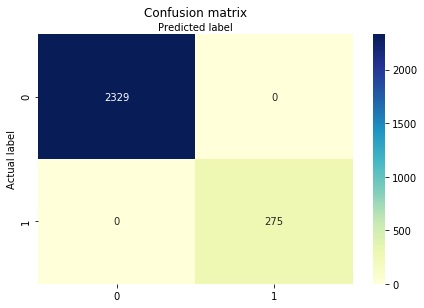

In [81]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_knn))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

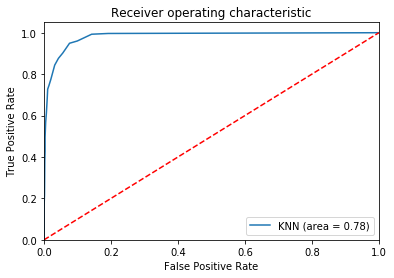

In [82]:
# ROC Curve
roc_auc_knn = roc_auc_score(y_test, model_knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Considerations
1. Tune parameters: C. It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly.
2. , Gamma. It defines how far the influence of a single training example reaches. If it has a low value it means that every point has a far reach and conversely high value of gamma means that every point has close reach.
3. Kernel Function

### Naive Bayes
Naive Bayes performs classification based on Bayes' theorem assuming conditional independence between every pair of features given the value of the class variable.

In [83]:
# Create and Train Model
model_nb = GaussianNB().fit(X_train,y_train)

# Model Prediction
y_prediction = model_nb.predict(X_test)

# Model Results
model_results = [['Score', model_nb.score(X_train, y_train)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_nb = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_nb

,Evaluation Metric,Value
0,Score,0.661962
1,Accuracy,0.657834


In [84]:
# Classification Report
classification_report_nb_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_nb_table = pd.DataFrame(classification_report_nb_table).transpose()
classification_report_nb_table

,precision,recall,f1-score,support
0,0.979333,0.630743,0.767302,2329.000000
1,0.221014,0.887273,0.353880,275.000000
accuracy,0.657834,0.657834,0.657834,0.657834
macro avg,0.600174,0.759008,0.560591,2604.000000
weighted avg,0.899250,0.657834,0.723642,2604.000000


In [85]:
# Confusion Matrix
model_confusion_matrix_nb = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_nb

array([[1469,  860],
       [  31,  244]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

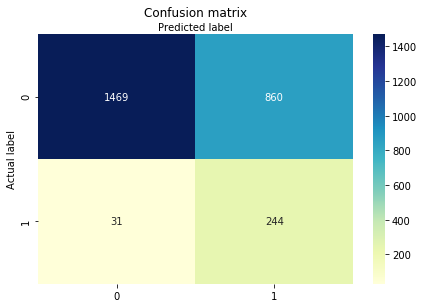

In [86]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_nb))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_nb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

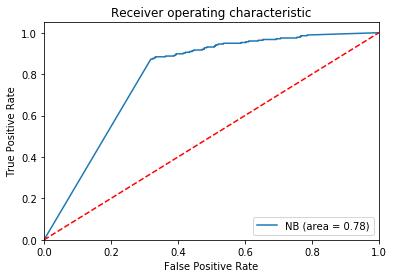

In [87]:
# ROC Curve
roc_auc_nb = roc_auc_score(y_test, model_nb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Considerations
1. Naive Bayes more suitable to univariate distributions, binary, categorical or nominal inputs

### Decision Tree
Decision Tree performs classification by splitting a dataset into smaller and smaller subsets forming a tree structure with decision nodes and leaf nodes.

In [88]:
# Create and Train Model
model_dt = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

# Model Prediction
y_prediction = model_dt.predict(X_test)

# Model Results
model_results = [['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_dt = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Score'])
model_results_dt

,Evaluation Metric,Score
0,Accuracy,0.986559


In [89]:
# Tuning Depth of Decision Tree
max_depth_range = list(range(1, 6))

accuracy = []
for depth in max_depth_range:
    
    model = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.9201228878648233,
 0.924347158218126,
 0.9408602150537635,
 0.9550691244239631,
 0.9608294930875576]

In [90]:
# Cross Validation Scores
print("Accuracy Scores Max:    {}".format(np.max(accuracy)))
print("Optimal Value for Depth: ", accuracy.index((np.max(accuracy))))
model_depth_range_accuracy_table = pd.DataFrame(accuracy, range(1,6), columns=['Score'])
model_depth_range_accuracy_table

Accuracy Scores Max:    0.9608294930875576
Optimal Value for Depth:  4


,Score
1,0.920123
2,0.924347
3,0.940860
4,0.955069
5,0.960829


In [91]:
# Create and Train Model
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth=4).fit(X_train,y_train)

# Model Prediction
y_prediction = model_dt.predict(X_test)

# Model Results
model_results = [['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_dt = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Score'])
model_results_dt

,Evaluation Metric,Score
0,Accuracy,0.951997


In [92]:
# Feature Importance
model_dt_featureimportance = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(model_dt.feature_importances_,3)})
model_dt_featureimportance = model_dt_featureimportance.sort_values('Importance',ascending=False)
model_dt_featureimportance

,Feature,Importance
1,year,0.571
150,EG.ELC.ACCS.RU.ZS,0.259
684,SP.DYN.AMRT.FE,0.111
755,TX.VAL.MRCH.R6.ZS,0.040
283,HD.HCI.OVRL,0.014
...,...,...
262,GC.REV.GOTR.ZS,0.000
263,GC.REV.SOCL.ZS,0.000
265,GC.TAX.EXPT.CN,0.000
266,GC.TAX.EXPT.ZS,0.000


In [93]:
# Classification Report
classification_report_dt_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_dt_table = pd.DataFrame(classification_report_dt_table).transpose()
classification_report_dt_table

,precision,recall,f1-score,support
0,0.950531,0.998283,0.973822,2329.000000
1,0.974684,0.560000,0.711316,275.000000
accuracy,0.951997,0.951997,0.951997,0.951997
macro avg,0.962608,0.779141,0.842569,2604.000000
weighted avg,0.953082,0.951997,0.946100,2604.000000


In [94]:
# Confusion Matrix
model_confusion_matrix_dt = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_dt

array([[2325,    4],
       [ 121,  154]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

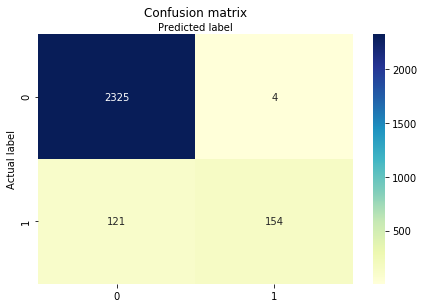

In [95]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_dt))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

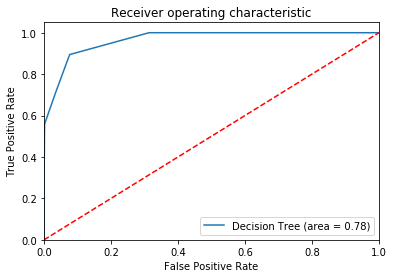

In [96]:
# ROC Curve
roc_auc_dt = roc_auc_score(y_test, model_dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Considerations
1. Reduce features
2. Sensitive to noisy data
3. Sensitive to variance, need to reduce by bagging and boosting
4. Need to balance out dataset
5. Visualize decision tree
6. Tune depth of decision tree
7. Select features based on importance

### Random Forest
Random Forest performs classification by creating decision trees on random subsets taking the average of all predictions.

In [97]:
# Create and Train Model
model_rf = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt', n_jobs=-1, verbose = 1).fit(X_train, y_train)

# Model Prediction
y_prediction = model_rf.predict(X_test)

# Model Results
model_results = [['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_rf = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Score'])
model_results_rf

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


,Evaluation Metric,Score
0,Accuracy,0.986559


In [98]:
# Statistics on Decision Trees in Random Forest
n_nodes = []
max_depths = []

for ind_tree in model_rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Average maximum depth: {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model_rf.predict(X_train)
train_rf_probs = model_rf.predict_proba(X_train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model_rf.predict(X_test)
rf_probs = model_rf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Average number of nodes: 777
Average maximum depth: 30


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


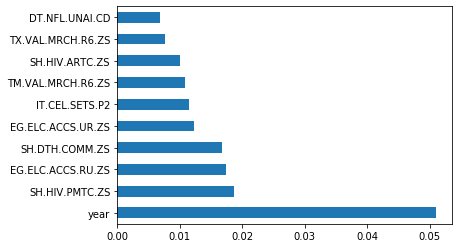

In [99]:
#Extra Trees Classifier
model_etc = ExtraTreesClassifier()
model_etc.fit(X,y)

# Feature Importances
feat_importances = pd.Series(model_etc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [100]:
# Feature Importance
model_featureimportance = pd.DataFrame({'feature': list(X_train.columns),
                                        'importance': model_rf.feature_importances_}).\
sort_values('importance', ascending = False)
model_featureimportance

,feature,importance
1,year,0.093200
541,SH.DTH.COMM.ZS,0.032293
556,SH.HIV.ARTC.ZS,0.017082
734,TM.VAL.MRCH.R6.ZS,0.015964
151,EG.ELC.ACCS.UR.ZS,0.015068
...,...,...
53,BX.PEF.TOTL.CD.WD,0.000000
28,BM.GSR.ROYL.CD,0.000000
246,FR.INR.DPST,0.000000
244,FP.CPI.TOTL.ZG,0.000000


In [101]:
# Classification Report
classification_report_rf_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_rf_table = pd.DataFrame(classification_report_rf_table).transpose()
classification_report_rf_table

,precision,recall,f1-score,support
0,0.988501,0.996565,0.992517,2329.000000
1,0.968750,0.901818,0.934087,275.000000
accuracy,0.986559,0.986559,0.986559,0.986559
macro avg,0.978625,0.949192,0.963302,2604.000000
weighted avg,0.986415,0.986559,0.986346,2604.000000


In [102]:
# Confusion Matrix
model_confusion_matrix_rf = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_rf

array([[2321,    8],
       [  27,  248]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

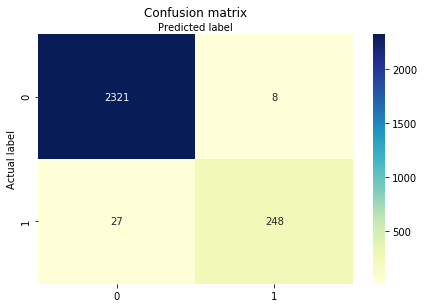

In [103]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_rf))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


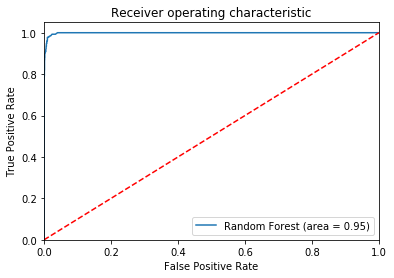

In [104]:
# ROC Curve
roc_auc_rf = roc_auc_score(y_test, model_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Considerations
1. Model is overfitted
2. Need to adjust feature importance
3. Need to optimize through random search using RandomizedSearchCV in scikit-learn

## Regression
For the purposes of this project, supervised machine learning regression models will be used to predict the continuous value of the number of conflicts to occur.

In [105]:
X = final_data_x
y = final_data_y_continuous
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### OLS Regression (OLS)
Ordinary Least Squares estimates parameters in a linear regression model through minimizing the sum of the squares of the differences between the observed dependent variables and those predicted by the linear function.

In [106]:
# Create and Fit Model
X_ols = sm.add_constant(X)
model_ols = sm.OLS(y, X_ols)
results = model_ols.fit()

# Model Results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     7.037
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:15:35   Log-Likelihood:            -1.0078e+05
No. Observations:               13020   AIC:                         2.031e+05
Df Residuals:                   12240   BIC:                         2.090e+05
Df Model:                         779                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

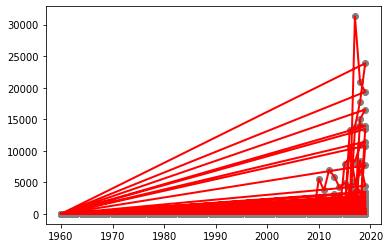

In [107]:
plt.scatter(X_ols['year'], y,  color='gray')
plt.plot(X_ols['year'], y, color='red', linewidth=2)
plt.show()

### Linear Regression
Linear regression predicts a continuous dependent variable based on a given independent variable.

In [108]:
# Create and Fit Model
model_linear = LinearRegression().fit(X_train, y_train) 

# Model Coefficients
model_coefficients_linear = model_linear.coef_

# Model Prediction
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

# Model Results
model_results = [['R-Squared', r2_score(y_train, y_prediction_train), r2_score(y_test, y_prediction_test)],
                 ['Mean Absolute Error', metrics.mean_absolute_error(y_train, y_prediction_train), metrics.mean_absolute_error(y_test, y_prediction_test)],
                 ['Mean Squared Error', metrics.mean_squared_error(y_train, y_prediction_train), metrics.mean_squared_error(y_test, y_prediction_test)],
                 ['Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_prediction_train)), np.sqrt(metrics.mean_squared_error(y_test, y_prediction_test))]]
model_results_linear = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Train', 'Test'])
model_results_linear

,Evaluation Metric,Train,Test
0,R-Squared,-0.006375,-0.006787
1,Mean Absolute Error,54.699693,53.507680
2,Mean Squared Error,461035.557412,412559.433948
3,Root Mean Squared Error,678.995992,642.307897


In [109]:
model_coefficients_linear_table = pd.DataFrame(model_linear.coef_.flatten(), X_train.columns, columns=['Coefficient'])
model_coefficients_linear_table

,Coefficient
country,-1.481330
year,6.967486
AG.AGR.TRAC.NO,-14.207524
AG.CON.FERT.PT.ZS,6.990599
AG.CON.FERT.ZS,24.359394
...,...
per_sa_allsa.adq_pop_tot,-121.821431
per_sa_allsa.ben_q1_tot,49.932354
per_sa_allsa.cov_pop_tot,-12.715700
per_si_allsi.ben_q1_tot,-31.132186


### Ridge Regression
Ridge Regression is a modified version of Linear Regression where a penalty parameter is added to the loss function to minimze the complexity of the model.

In [110]:
# Create and Fit Model
model_ridge = Ridge(alpha=0.01).fit(X_train, y_train) 

# Model Coefficients
model_coefficients_ridge = model_ridge.coef_

# Model Prediction
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

# Model Results
model_results = [['R-Squared', r2_score(y_train, y_prediction_train), r2_score(y_test, y_prediction_test)],
                 ['Mean Absolute Error', metrics.mean_absolute_error(y_train, y_prediction_train), metrics.mean_absolute_error(y_test, y_prediction_test)],
                 ['Mean Squared Error', metrics.mean_squared_error(y_train, y_prediction_train), metrics.mean_squared_error(y_test, y_prediction_test)],
                 ['Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_prediction_train)), np.sqrt(metrics.mean_squared_error(y_test, y_prediction_test))]]
model_results_ridge = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Train', 'Test'])
model_results_ridge

,Evaluation Metric,Train,Test
0,R-Squared,-0.006375,-0.006787
1,Mean Absolute Error,54.699693,53.507680
2,Mean Squared Error,461035.557412,412559.433948
3,Root Mean Squared Error,678.995992,642.307897


In [111]:
model_coefficients_ridge_table = pd.DataFrame(model_ridge.coef_.flatten(), X_train.columns, columns=['Coefficient'])
model_coefficients_ridge_table

,Coefficient
country,-1.480974
year,6.967508
AG.AGR.TRAC.NO,-14.206001
AG.CON.FERT.PT.ZS,6.991392
AG.CON.FERT.ZS,24.358423
...,...
per_sa_allsa.adq_pop_tot,-121.812980
per_sa_allsa.ben_q1_tot,49.927806
per_sa_allsa.cov_pop_tot,-12.715781
per_si_allsi.ben_q1_tot,-31.132761


### Lasso Regression
Lasso Regression, or Least Absolute Shrinkage and Selection Operator, is a modified version of Linear Regression where the sum of the absolute values of the model coefficients is limited in the loss function to minimze the complexity of the model.

In [112]:
# Create and Fit Model
model_lasso = Lasso(alpha=0.01).fit(X_train, y_train) 

# Model Coefficients
model_coefficients_lasso = model_lasso.coef_

# Model Prediction
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

# Model Results
model_results = [['R-Squared', r2_score(y_train, y_prediction_train), r2_score(y_test, y_prediction_test)],
                 ['Mean Absolute Error', metrics.mean_absolute_error(y_train, y_prediction_train), metrics.mean_absolute_error(y_test, y_prediction_test)],
                 ['Mean Squared Error', metrics.mean_squared_error(y_train, y_prediction_train), metrics.mean_squared_error(y_test, y_prediction_test)],
                 ['Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_prediction_train)), np.sqrt(metrics.mean_squared_error(y_test, y_prediction_test))]]
model_results_lasso = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Train', 'Test'])
model_results_lasso

,Evaluation Metric,Train,Test
0,R-Squared,-0.006375,-0.006787
1,Mean Absolute Error,54.699693,53.507680
2,Mean Squared Error,461035.557412,412559.433948
3,Root Mean Squared Error,678.995992,642.307897


In [113]:
model_coefficients_lasso_table = pd.DataFrame(model_lasso.coef_.flatten(), X_train.columns, columns=['Coefficient'])
model_coefficients_lasso_table

,Coefficient
country,-1.447313
year,6.958905
AG.AGR.TRAC.NO,-13.950190
AG.CON.FERT.PT.ZS,6.915607
AG.CON.FERT.ZS,24.257875
...,...
per_sa_allsa.adq_pop_tot,-120.626410
per_sa_allsa.ben_q1_tot,49.756949
per_sa_allsa.cov_pop_tot,-12.890328
per_si_allsi.ben_q1_tot,-30.323537


### ElasticNet Regression
ElasticNet Regression is a combination of both Ridge and Lasso Regression using properties from both to minimze the complexity of the model.

In [114]:
# Create and Fit Model
model_elasticnet = ElasticNet(alpha=0.01).fit(X_train, y_train) 

# Model Coefficients
model_coefficients_elasticnet = model_elasticnet.coef_

# Model Prediction
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

# Model Results
model_results = [['R-Squared', r2_score(y_train, y_prediction_train), r2_score(y_test, y_prediction_test)],
                 ['Mean Absolute Error', metrics.mean_absolute_error(y_train, y_prediction_train), metrics.mean_absolute_error(y_test, y_prediction_test)],
                 ['Mean Squared Error', metrics.mean_squared_error(y_train, y_prediction_train), metrics.mean_squared_error(y_test, y_prediction_test)],
                 ['Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_prediction_train)), np.sqrt(metrics.mean_squared_error(y_test, y_prediction_test))]]
model_results_elasticnet = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Train', 'Test'])
model_results_elasticnet

,Evaluation Metric,Train,Test
0,R-Squared,-0.006375,-0.006787
1,Mean Absolute Error,54.699693,53.507680
2,Mean Squared Error,461035.557412,412559.433948
3,Root Mean Squared Error,678.995992,642.307897


In [115]:
model_coefficients_elasticnet_table = pd.DataFrame(model_elasticnet.coef_.flatten(), X_train.columns, columns=['Coefficient'])
model_coefficients_elasticnet_table

,Coefficient
country,-0.561975
year,7.002862
AG.AGR.TRAC.NO,-7.649022
AG.CON.FERT.PT.ZS,8.063931
AG.CON.FERT.ZS,20.786897
...,...
per_sa_allsa.adq_pop_tot,-90.959802
per_sa_allsa.ben_q1_tot,33.783633
per_sa_allsa.cov_pop_tot,-13.366865
per_si_allsi.ben_q1_tot,-24.194299


### Comparing Regression Models

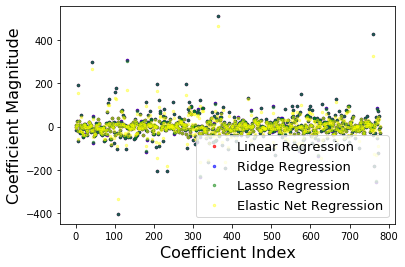

In [116]:
plt.plot(model_coefficients_linear_table['Coefficient'].values,alpha=0.7,linestyle='none',marker='.',markersize=5,color='red',label='Linear Regression')
plt.plot(model_coefficients_ridge_table['Coefficient'].values,alpha=0.6,linestyle='none',marker='.',markersize=5,color='blue',label='Ridge Regression')
plt.plot(model_coefficients_lasso,alpha=0.5,linestyle='none',marker='.',markersize=5,color='green',label='Lasso Regression')
plt.plot(model_coefficients_elasticnet,alpha=0.4,linestyle='none',marker='.',markersize=5,color='yellow',label='Elastic Net Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [117]:
model_results_linear.rename(columns={model_results_linear.columns[1]: "Linear (Train)" }, inplace = True)
model_results_linear.rename(columns={model_results_linear.columns[2]: "Linear (Test)" }, inplace = True)
model_results_ridge.rename(columns={model_results_ridge.columns[1]: "Ridge (Train)" }, inplace = True)
model_results_ridge.rename(columns={model_results_ridge.columns[2]: "Ridge (Test)" }, inplace = True)
model_results_lasso.rename(columns={model_results_lasso.columns[1]: "Lasso (Train)" }, inplace = True)
model_results_lasso.rename(columns={model_results_lasso.columns[2]: "Lasso (Test)" }, inplace = True)
model_results_elasticnet.rename(columns={model_results_elasticnet.columns[1]: "Elastic Net (Train)" }, inplace = True)
model_results_elasticnet.rename(columns={model_results_elasticnet.columns[2]: "Elastic Net (Test)" }, inplace = True)
model_regression_results = pd.merge(model_results_linear, model_results_ridge, how='left', left_on='Evaluation Metric', right_on='Evaluation Metric')
model_regression_results = pd.merge(model_regression_results, model_results_lasso, how='left', left_on='Evaluation Metric', right_on='Evaluation Metric')
model_regression_results = pd.merge(model_regression_results, model_results_elasticnet, how='left', left_on='Evaluation Metric', right_on='Evaluation Metric')
model_regression_results

,Evaluation Metric,Linear (Train),Linear (Test),Ridge (Train),Ridge (Test),Lasso (Train),Lasso (Test),Elastic Net (Train),Elastic Net (Test)
0,R-Squared,-0.006375,-0.006787,-0.006375,-0.006787,-0.006375,-0.006787,-0.006375,-0.006787
1,Mean Absolute Error,54.699693,53.507680,54.699693,53.507680,54.699693,53.507680,54.699693,53.507680
2,Mean Squared Error,461035.557412,412559.433948,461035.557412,412559.433948,461035.557412,412559.433948,461035.557412,412559.433948
3,Root Mean Squared Error,678.995992,642.307897,678.995992,642.307897,678.995992,642.307897,678.995992,642.307897
